In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
sns.set(style='ticks', palette='Set2')
plt.rcParams['figure.figsize'] = 40, 32

In [2]:
data_url = "https://gist.githubusercontent.com/jattenberg/9f5174e365821dcdeda810c00d60830f/raw/ad8bff35b14ae9bbd6c72d5bb8c170b94b7b522f/country_stats.tsv"
country_data = pd.read_csv(data_url, sep="\t", index_col="country")

country_data.head(5)

,median age,land area (sq km),gdp per capita,life expectancy,military spending (% gdp),population,national savings (% gdp),unemployment rate
country,,,,,,,,
Afghanistan,18.8,652230.0,1900.0,51.7,0.89,34124811.0,22.7,35.0
Akrotiri,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN
Albania,32.9,28748.0,12500.0,78.5,1.22,3047987.0,15.6,14.0
Algeria,28.1,2381741.0,15100.0,77.0,6.55,40969443.0,34.9,11.7
American Samoa,25.5,199.0,13000.0,73.4,NaN,51504.0,NaN,29.8


## Tree Map (Don't do this!)

In [3]:
!sudo pip install squarify
import squarify

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


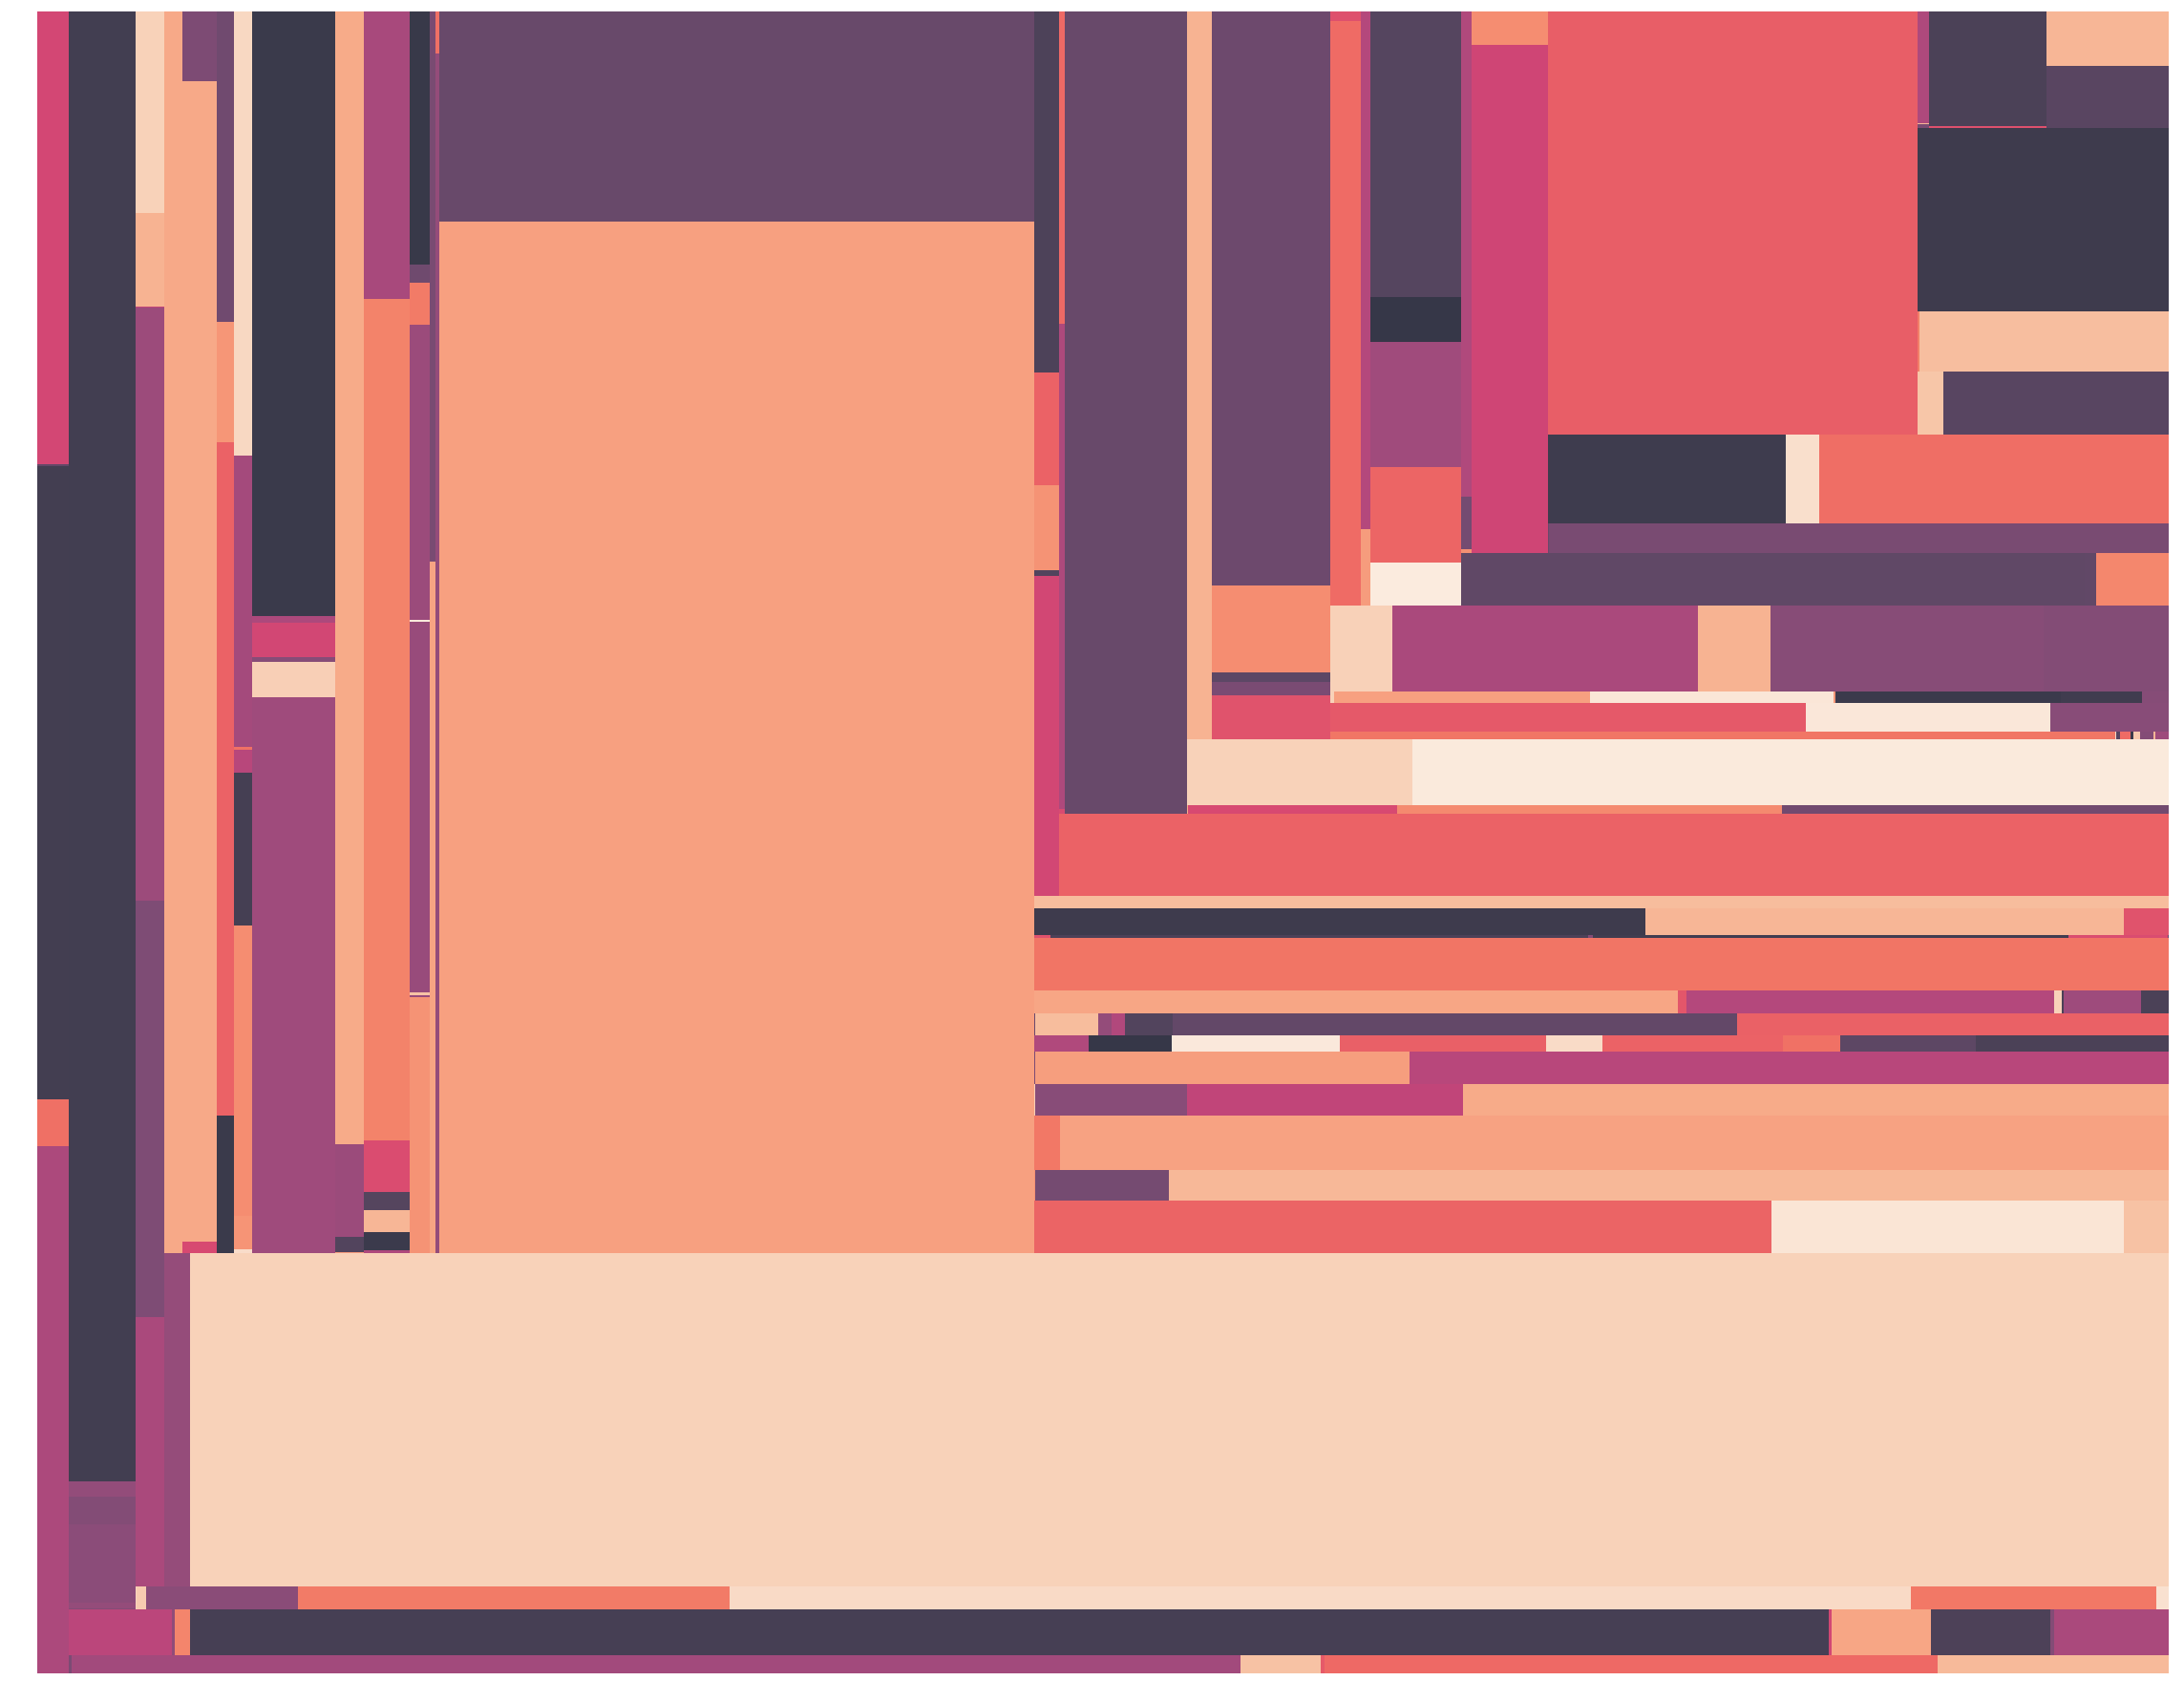

In [17]:
populations = country_data["population"].dropna()
squarify.plot(populations, alpha=0.8)
plt.axis('off')
plt.show()

### Too many entries! Let's just keep the top 20

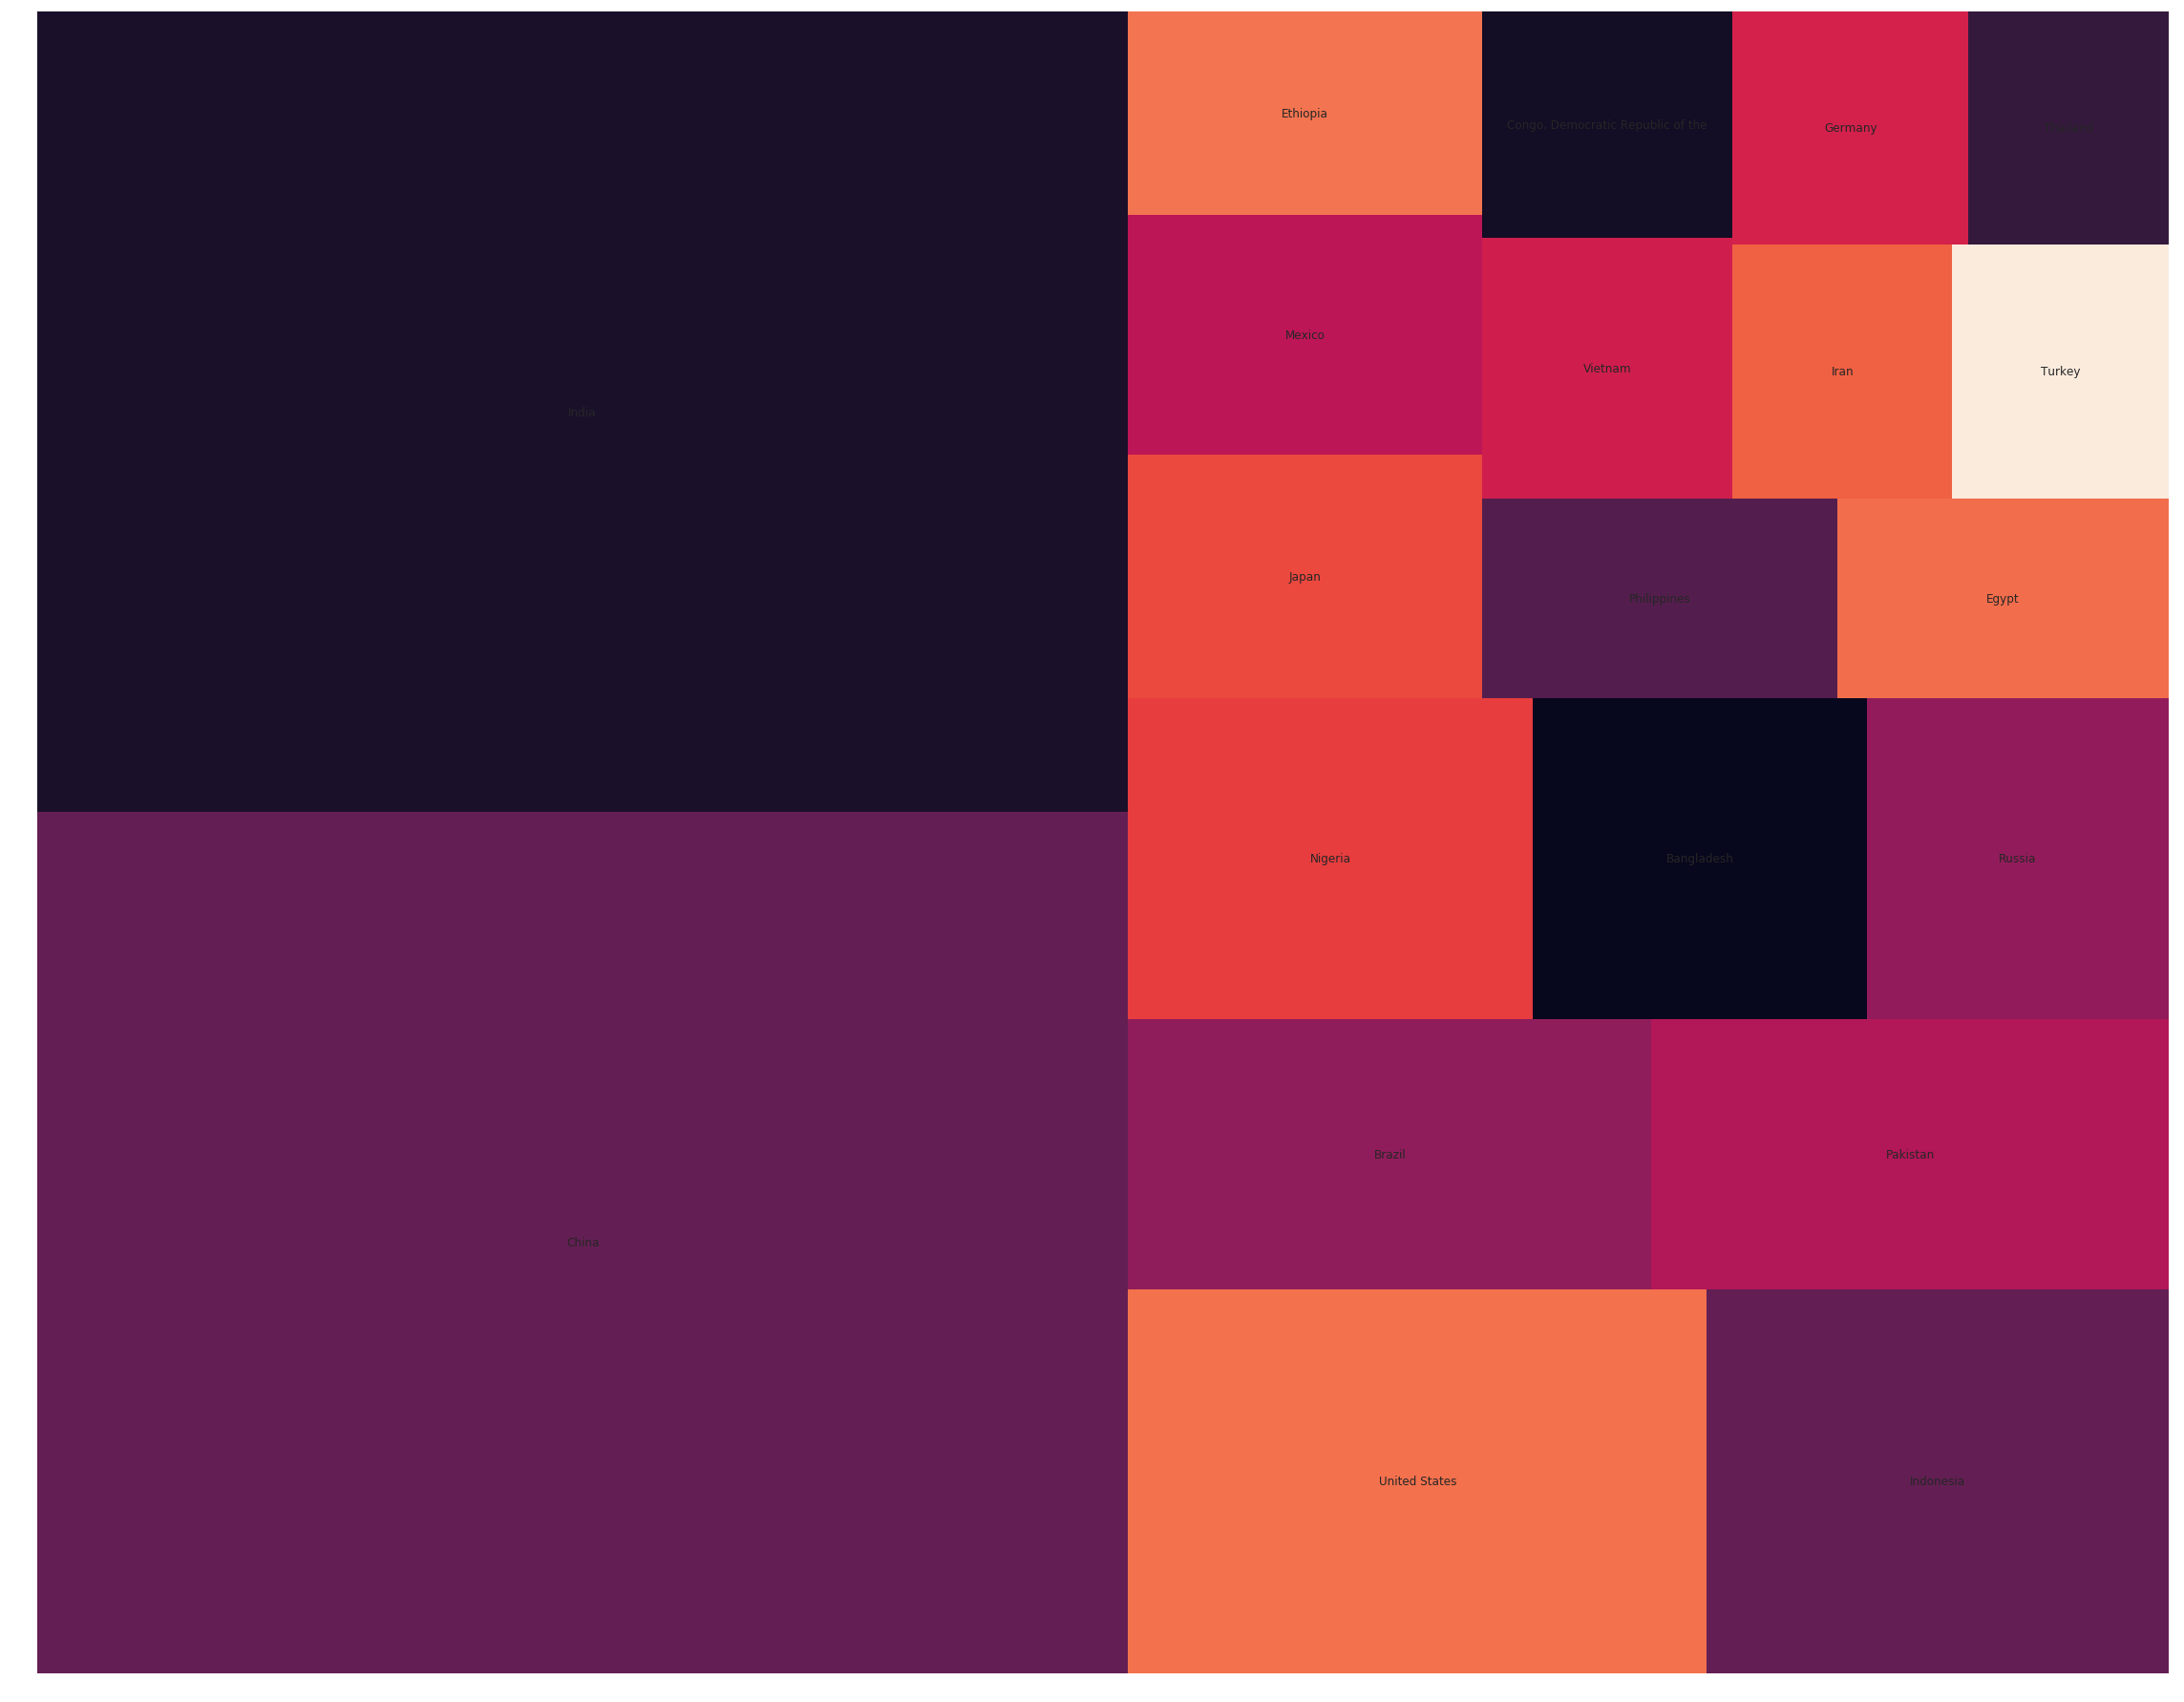

In [18]:
largest_pop = populations.nlargest(20)
squarify.plot(largest_pop, label=largest_pop.index)
plt.axis('off')
plt.show()

### Bangladesh or Russia? what is bigger? The Tree Map is difficult to read!
### Solution: Bar Chart

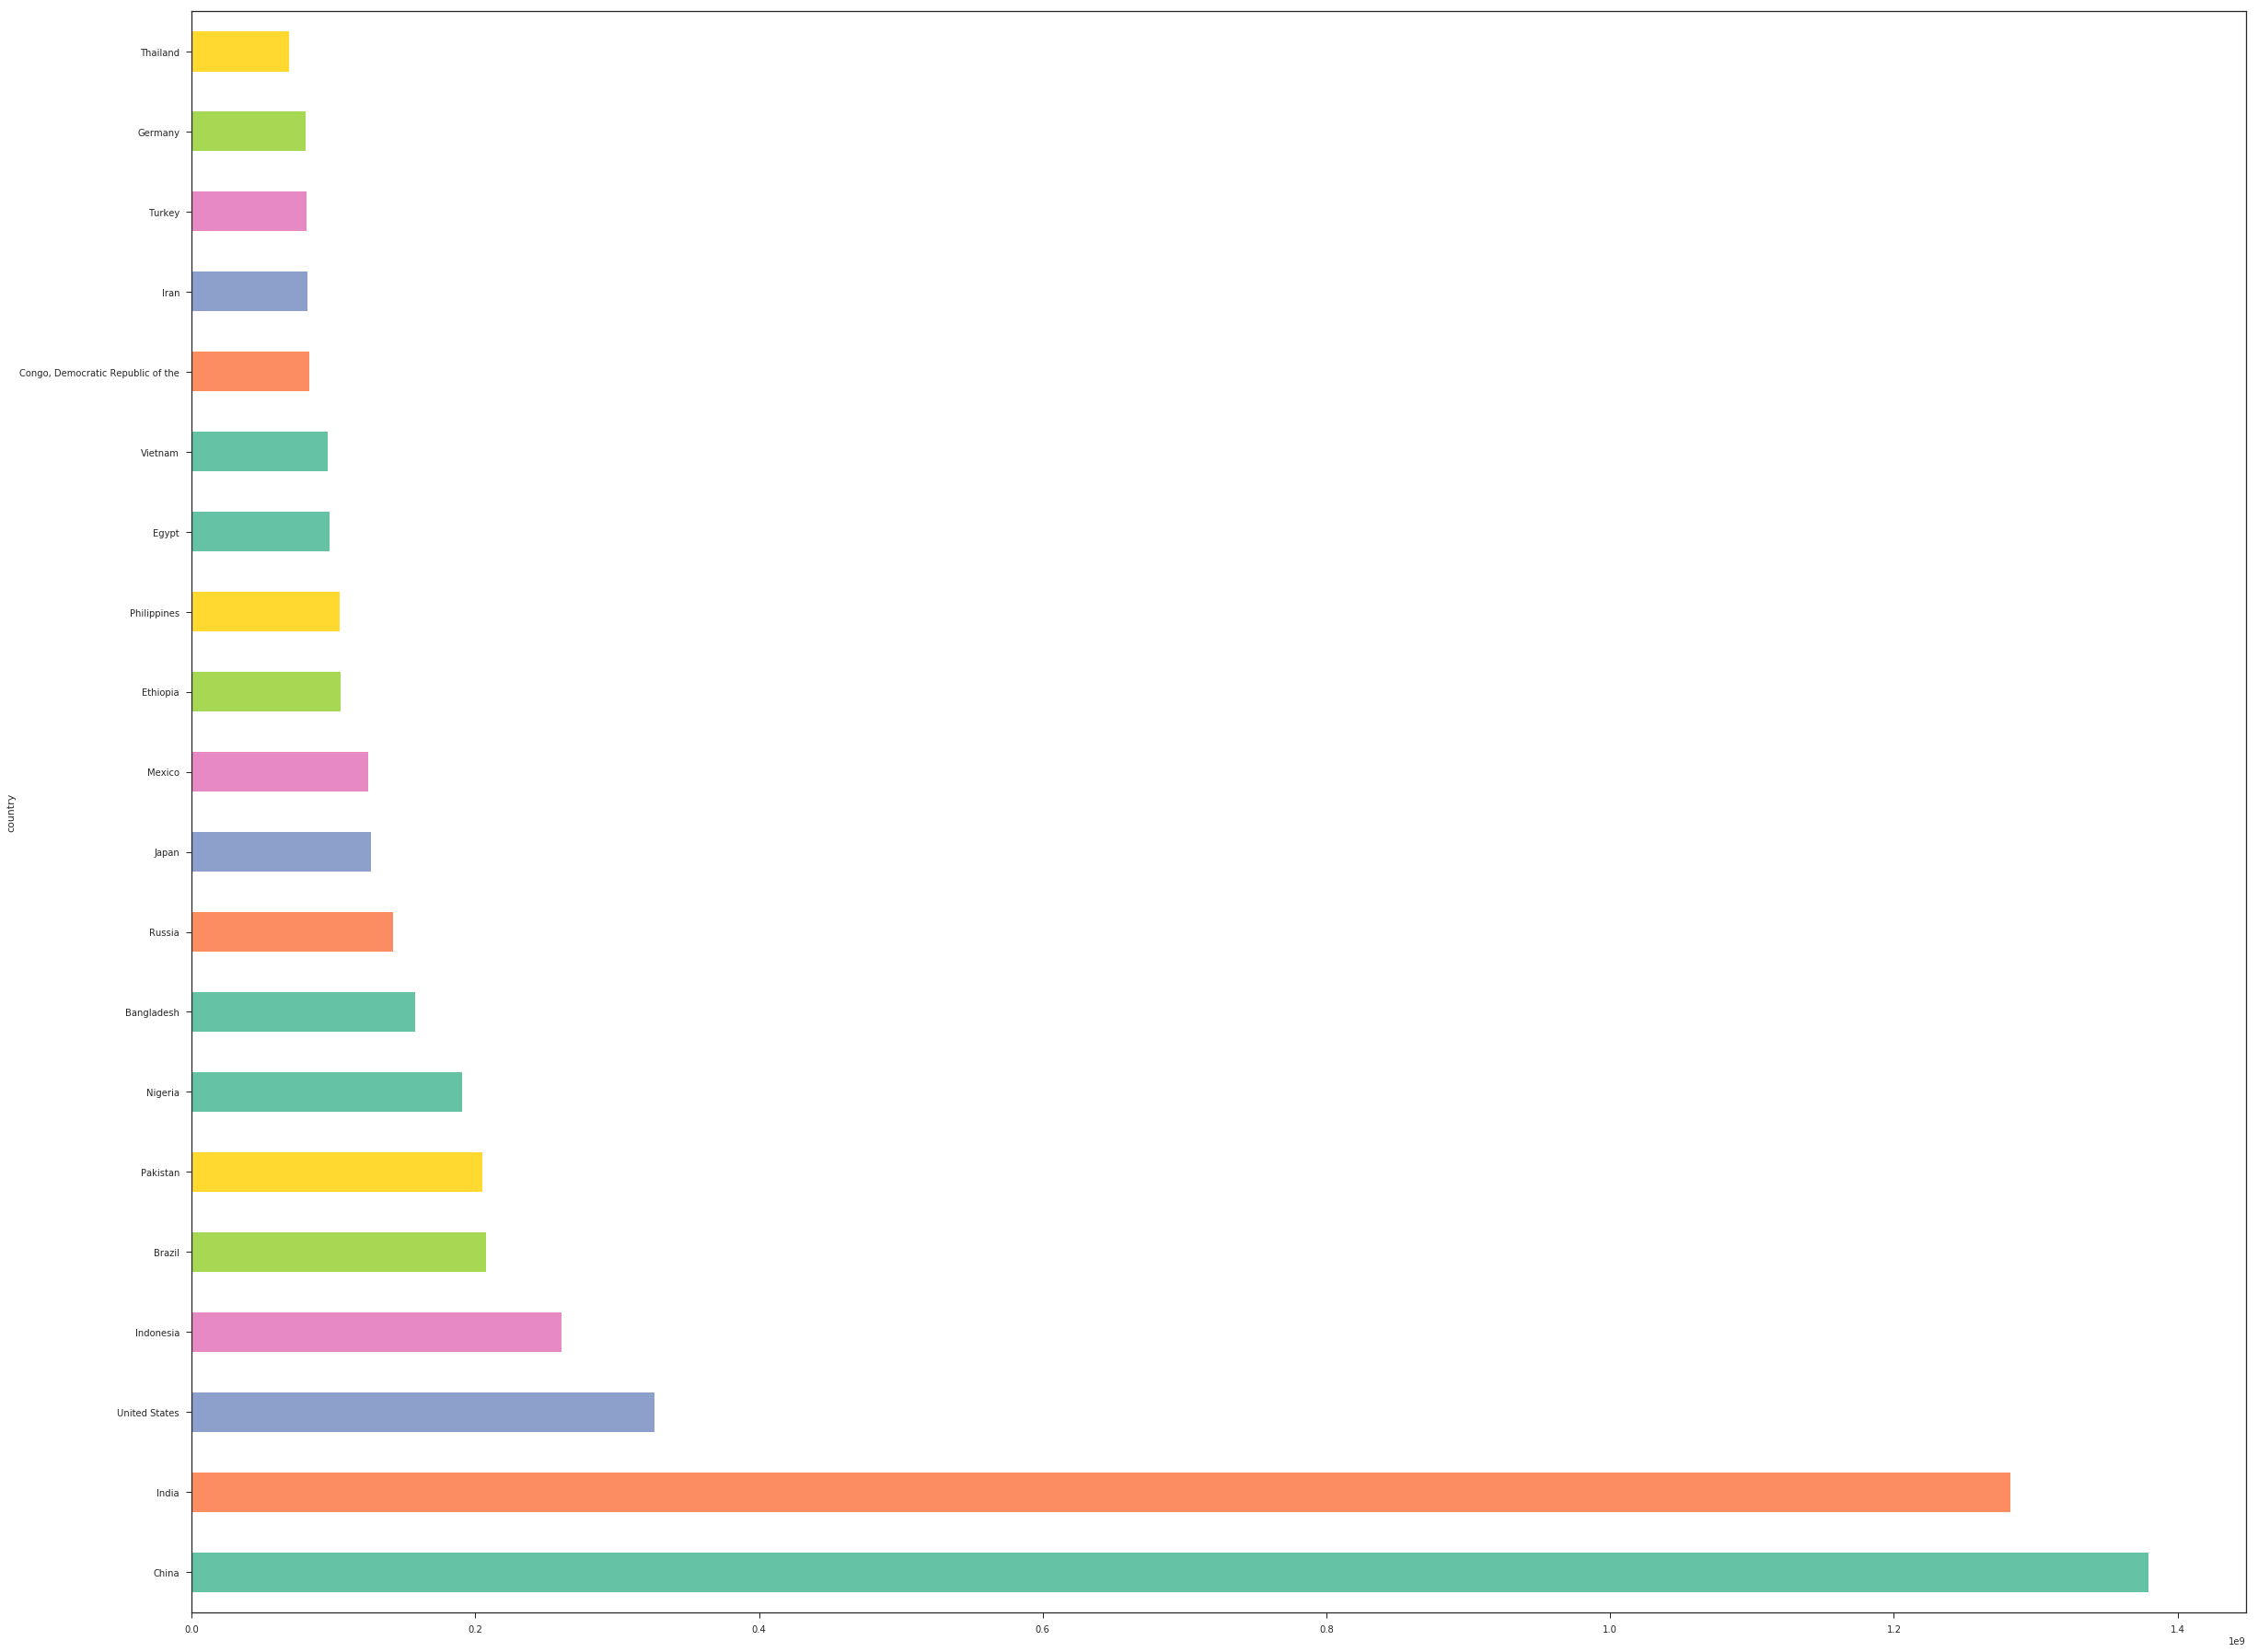

In [19]:
largest_pop.plot(kind="barh")
plt.show()

### How to make this descending?

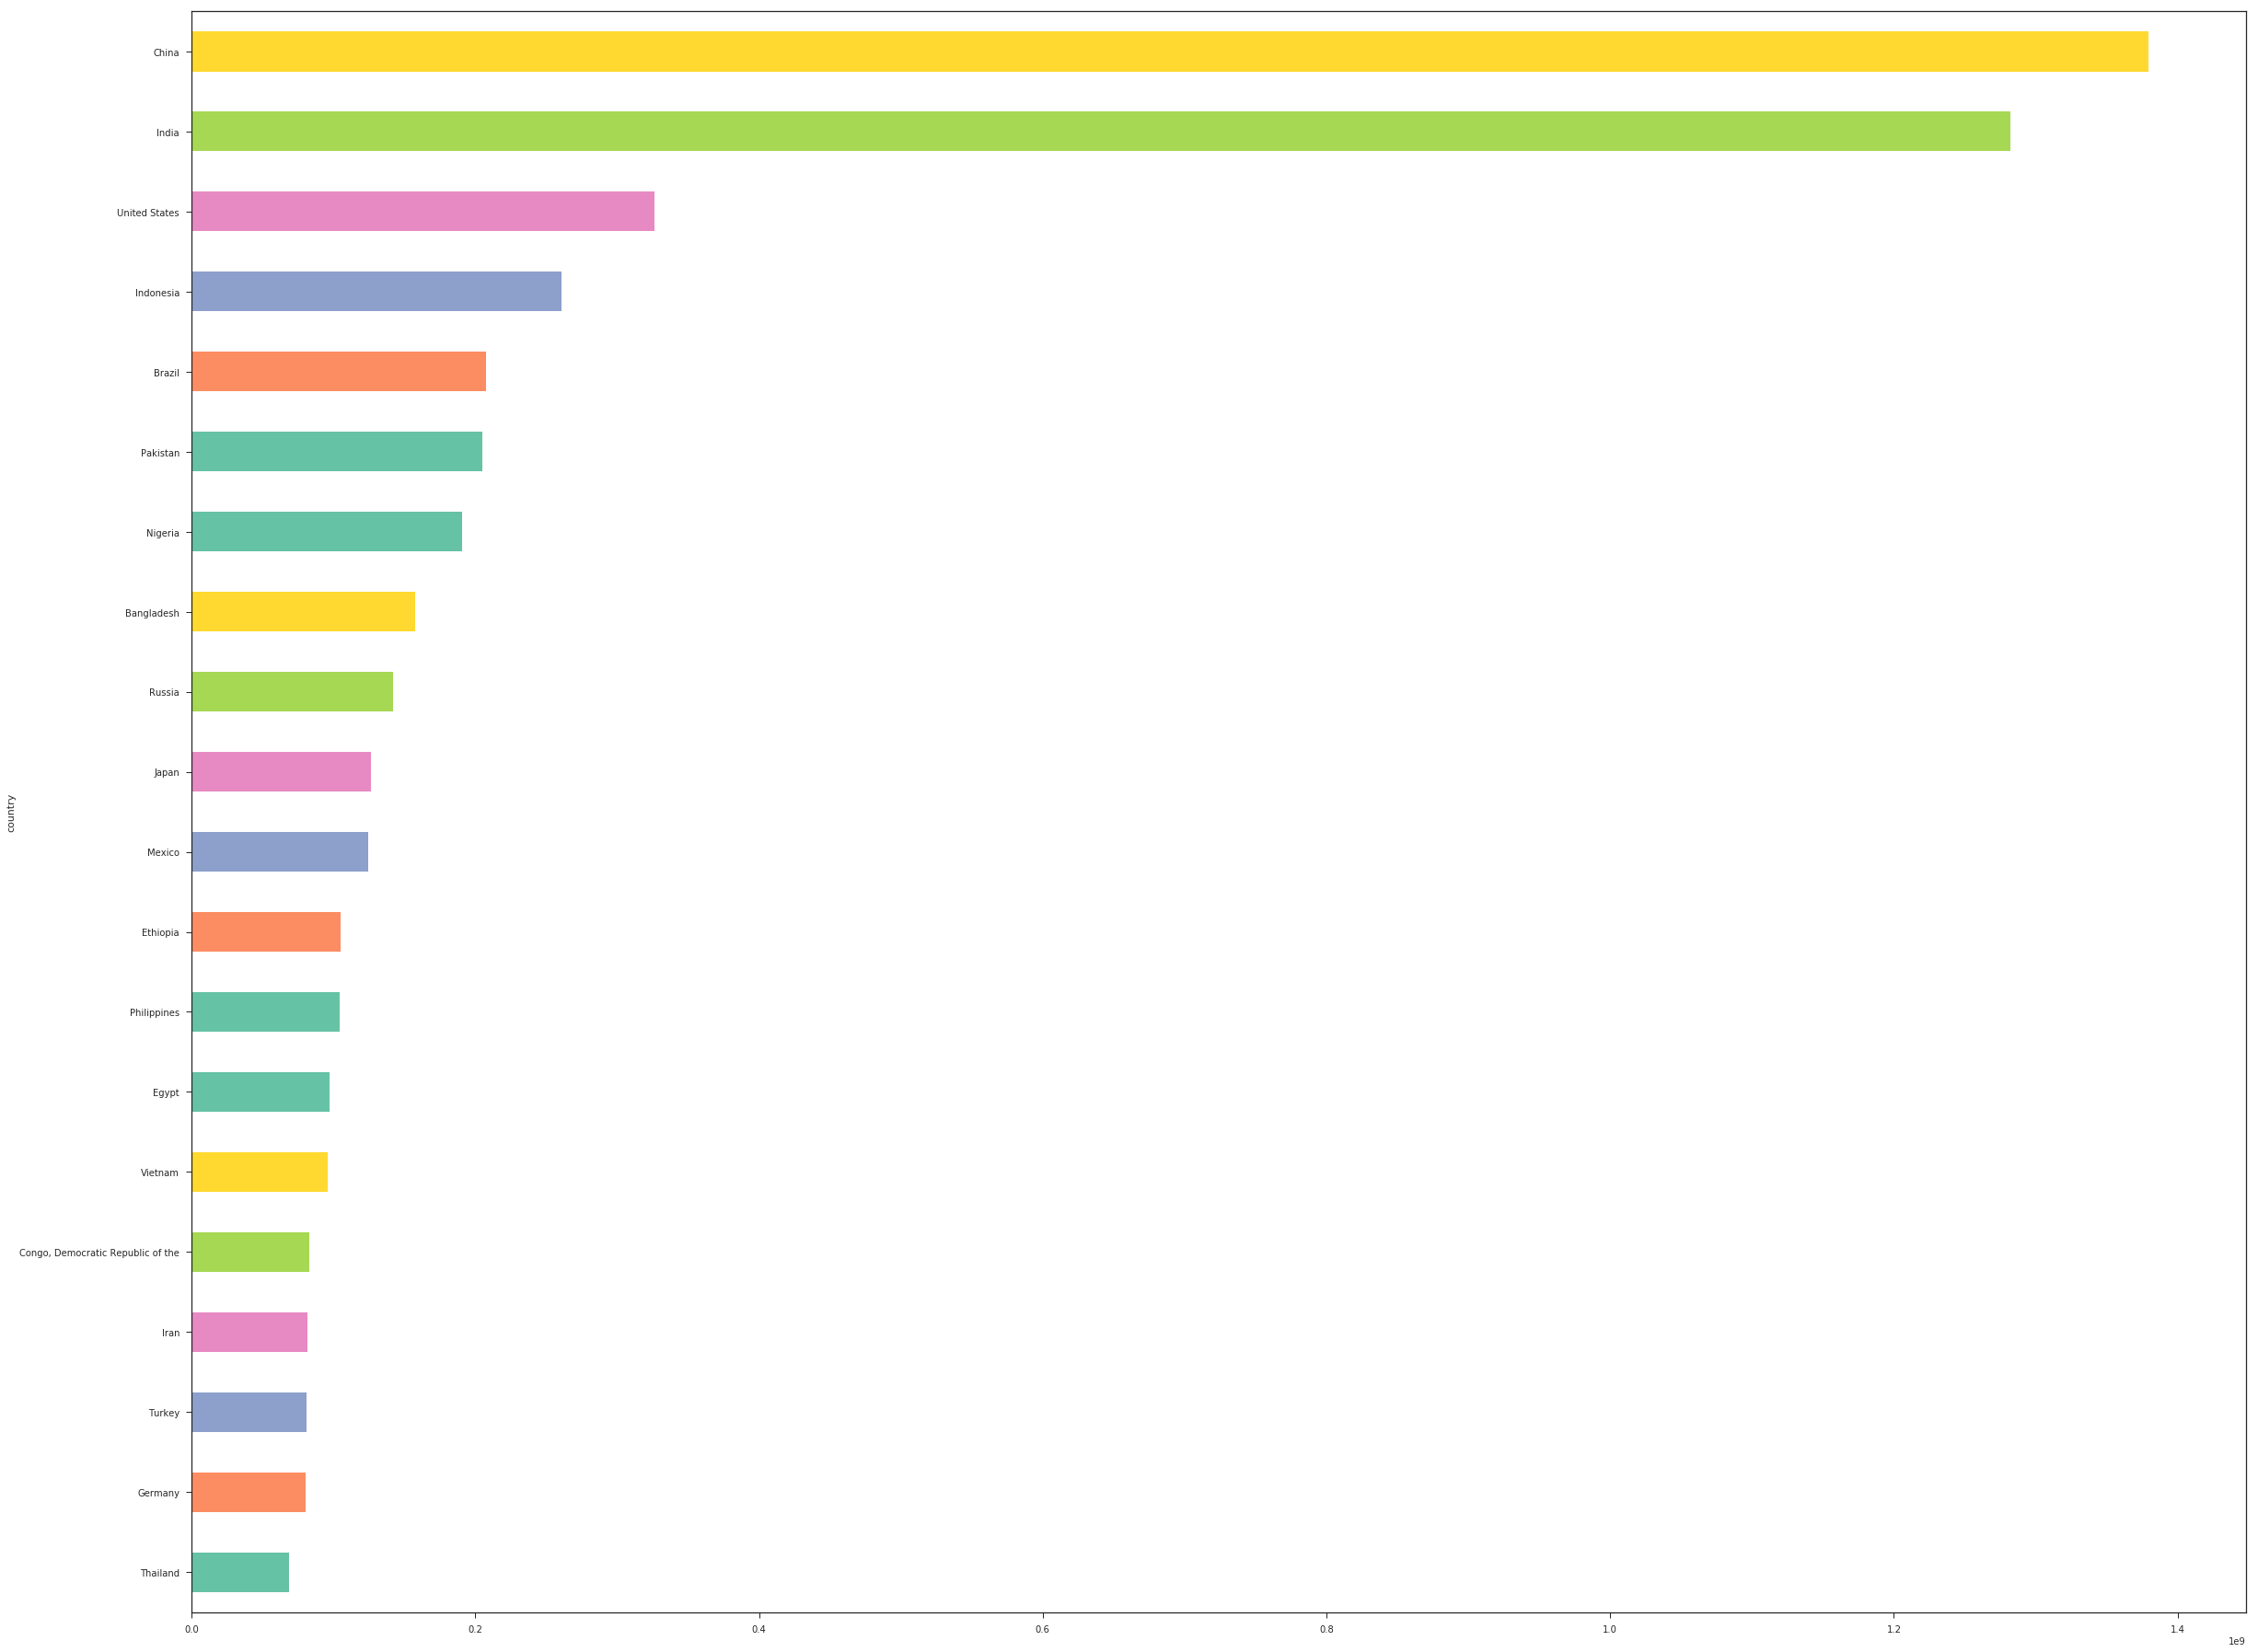

In [20]:
largest_pop.sort_values(ascending=True).plot(kind="barh")
plt.show()

What if we want a line with the median population?

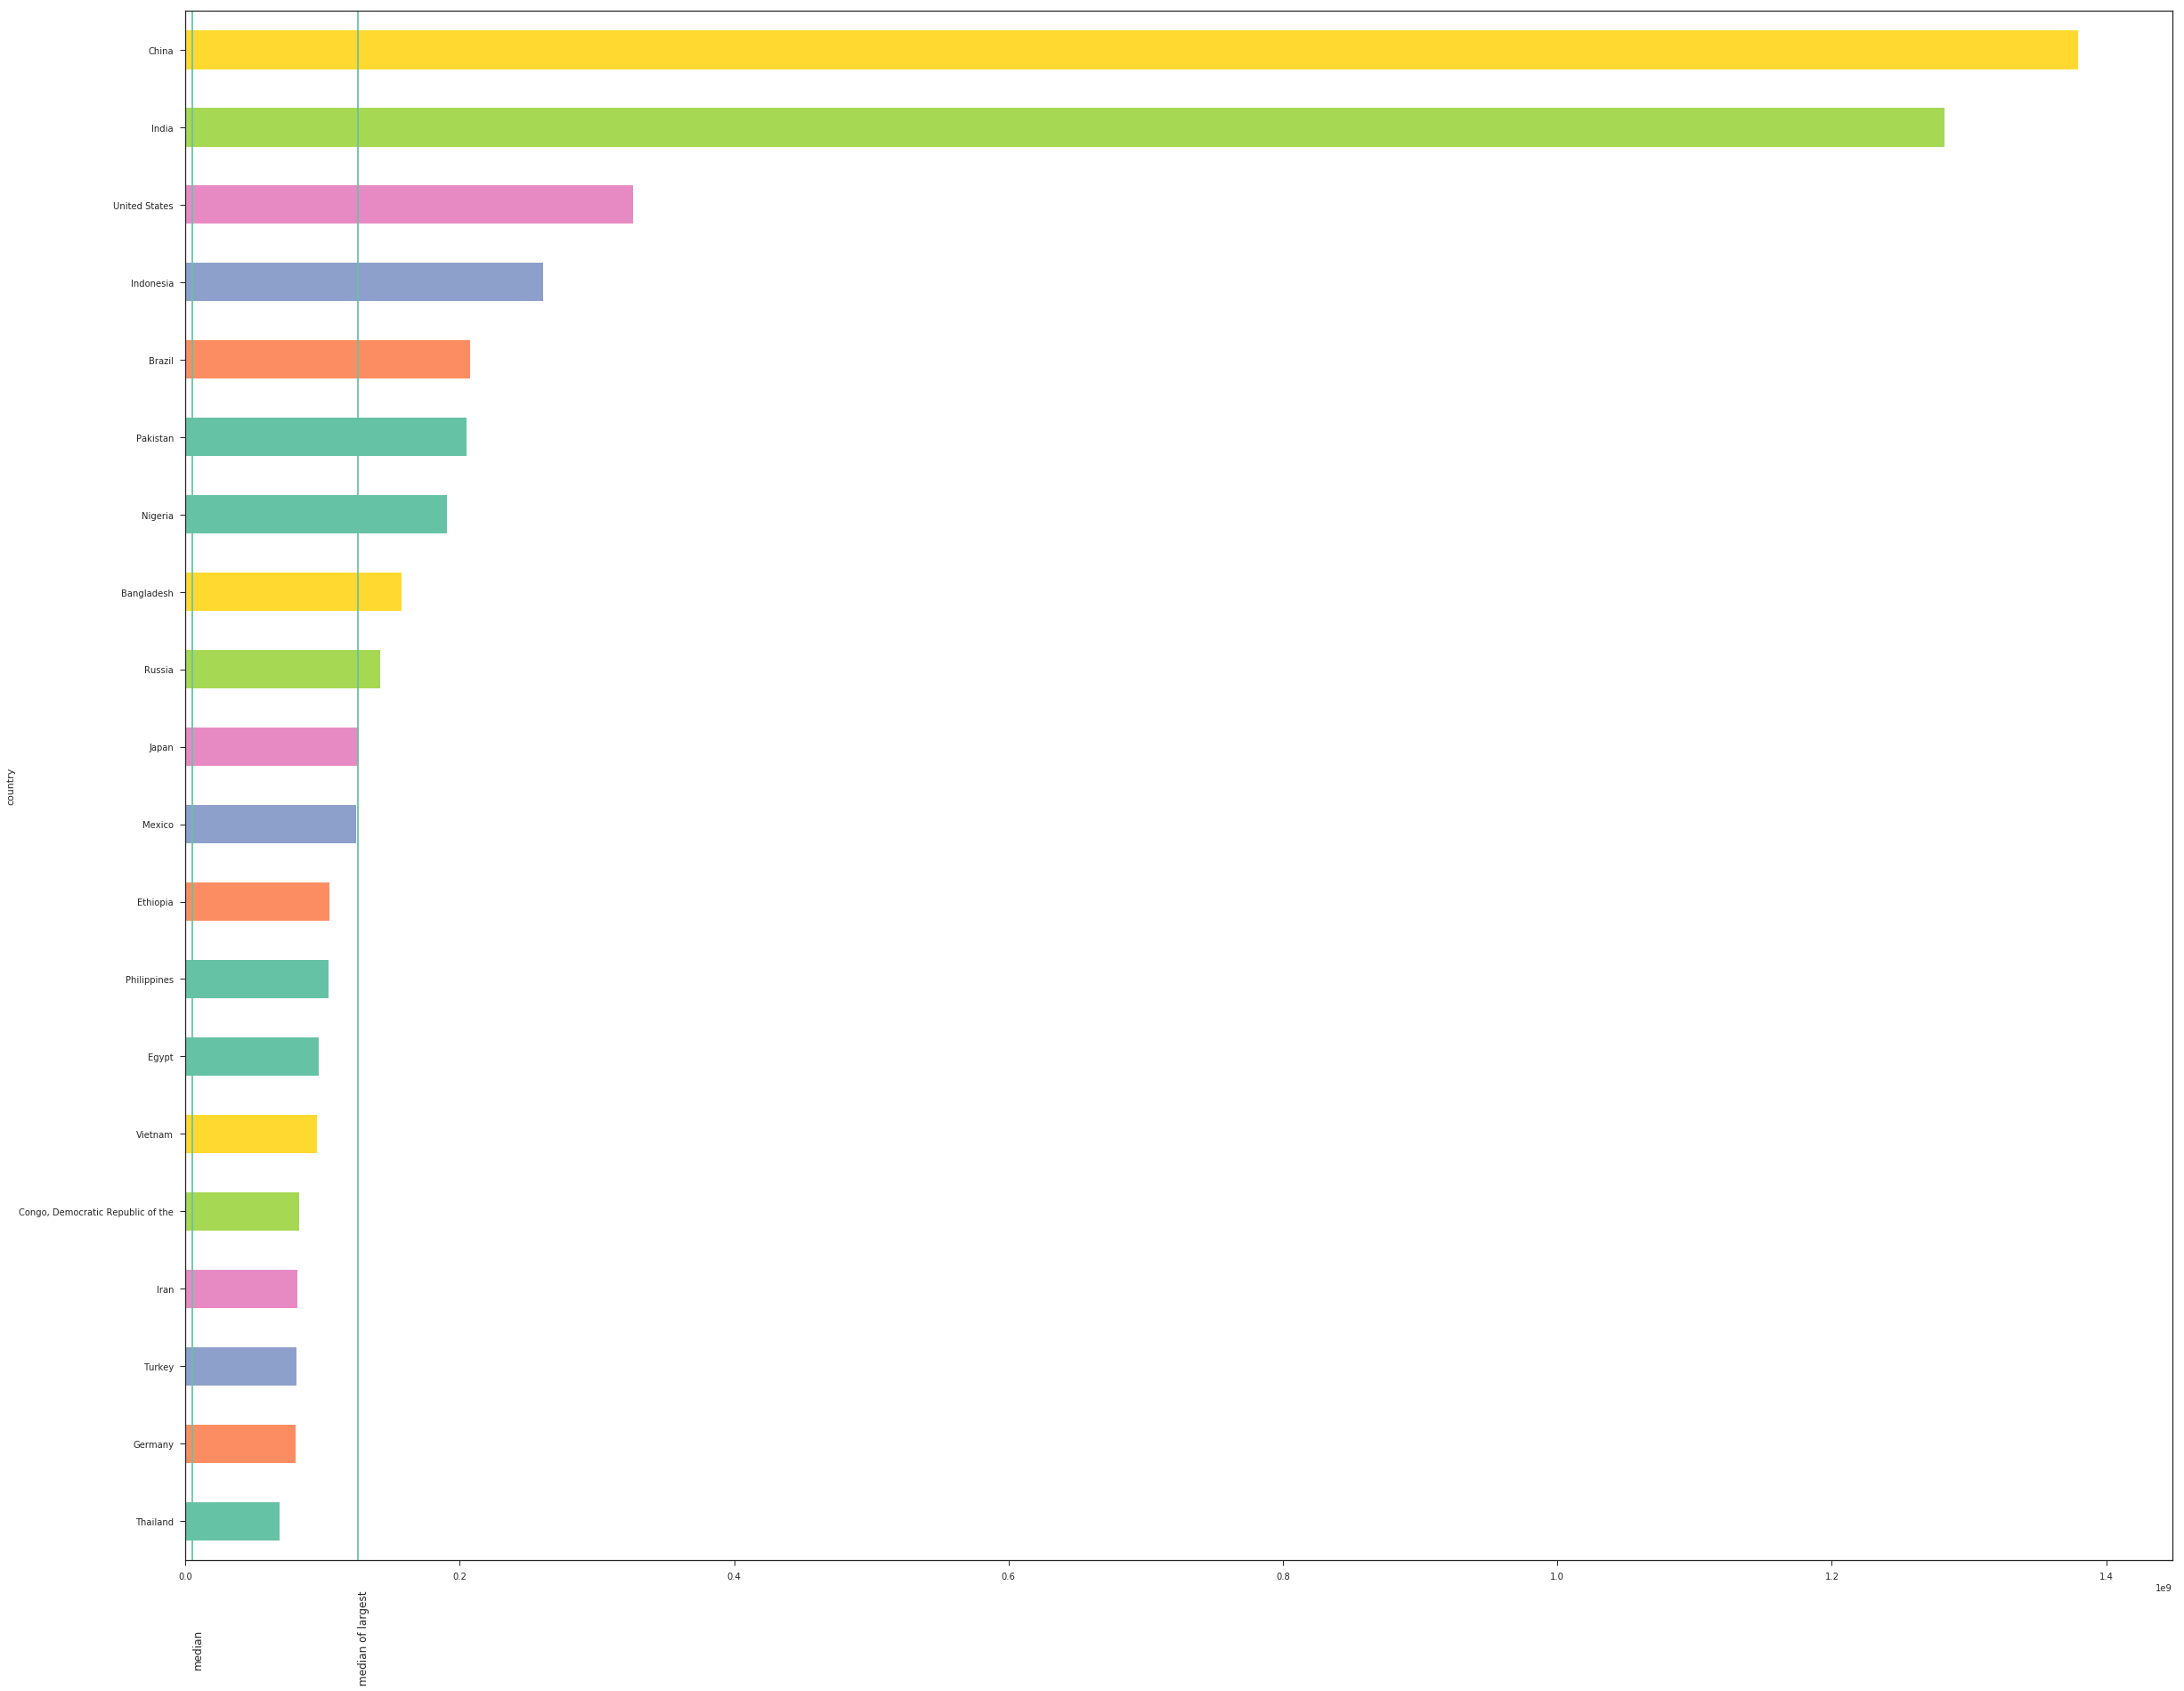

In [21]:
largest_pop.sort_values(ascending=True).plot(kind="barh")
median_overall = populations.median()
median_largest =  largest_pop.median()
plt.axvline(x=median_overall, label="median population")
plt.text(median_overall,-1.5,'median',rotation=90)
plt.axvline(x=median_largest, label="median of largest")
plt.text(median_largest,-1.0,'median of largest',rotation=90)
plt.show()

### let's try with a log-scale on the x-axis

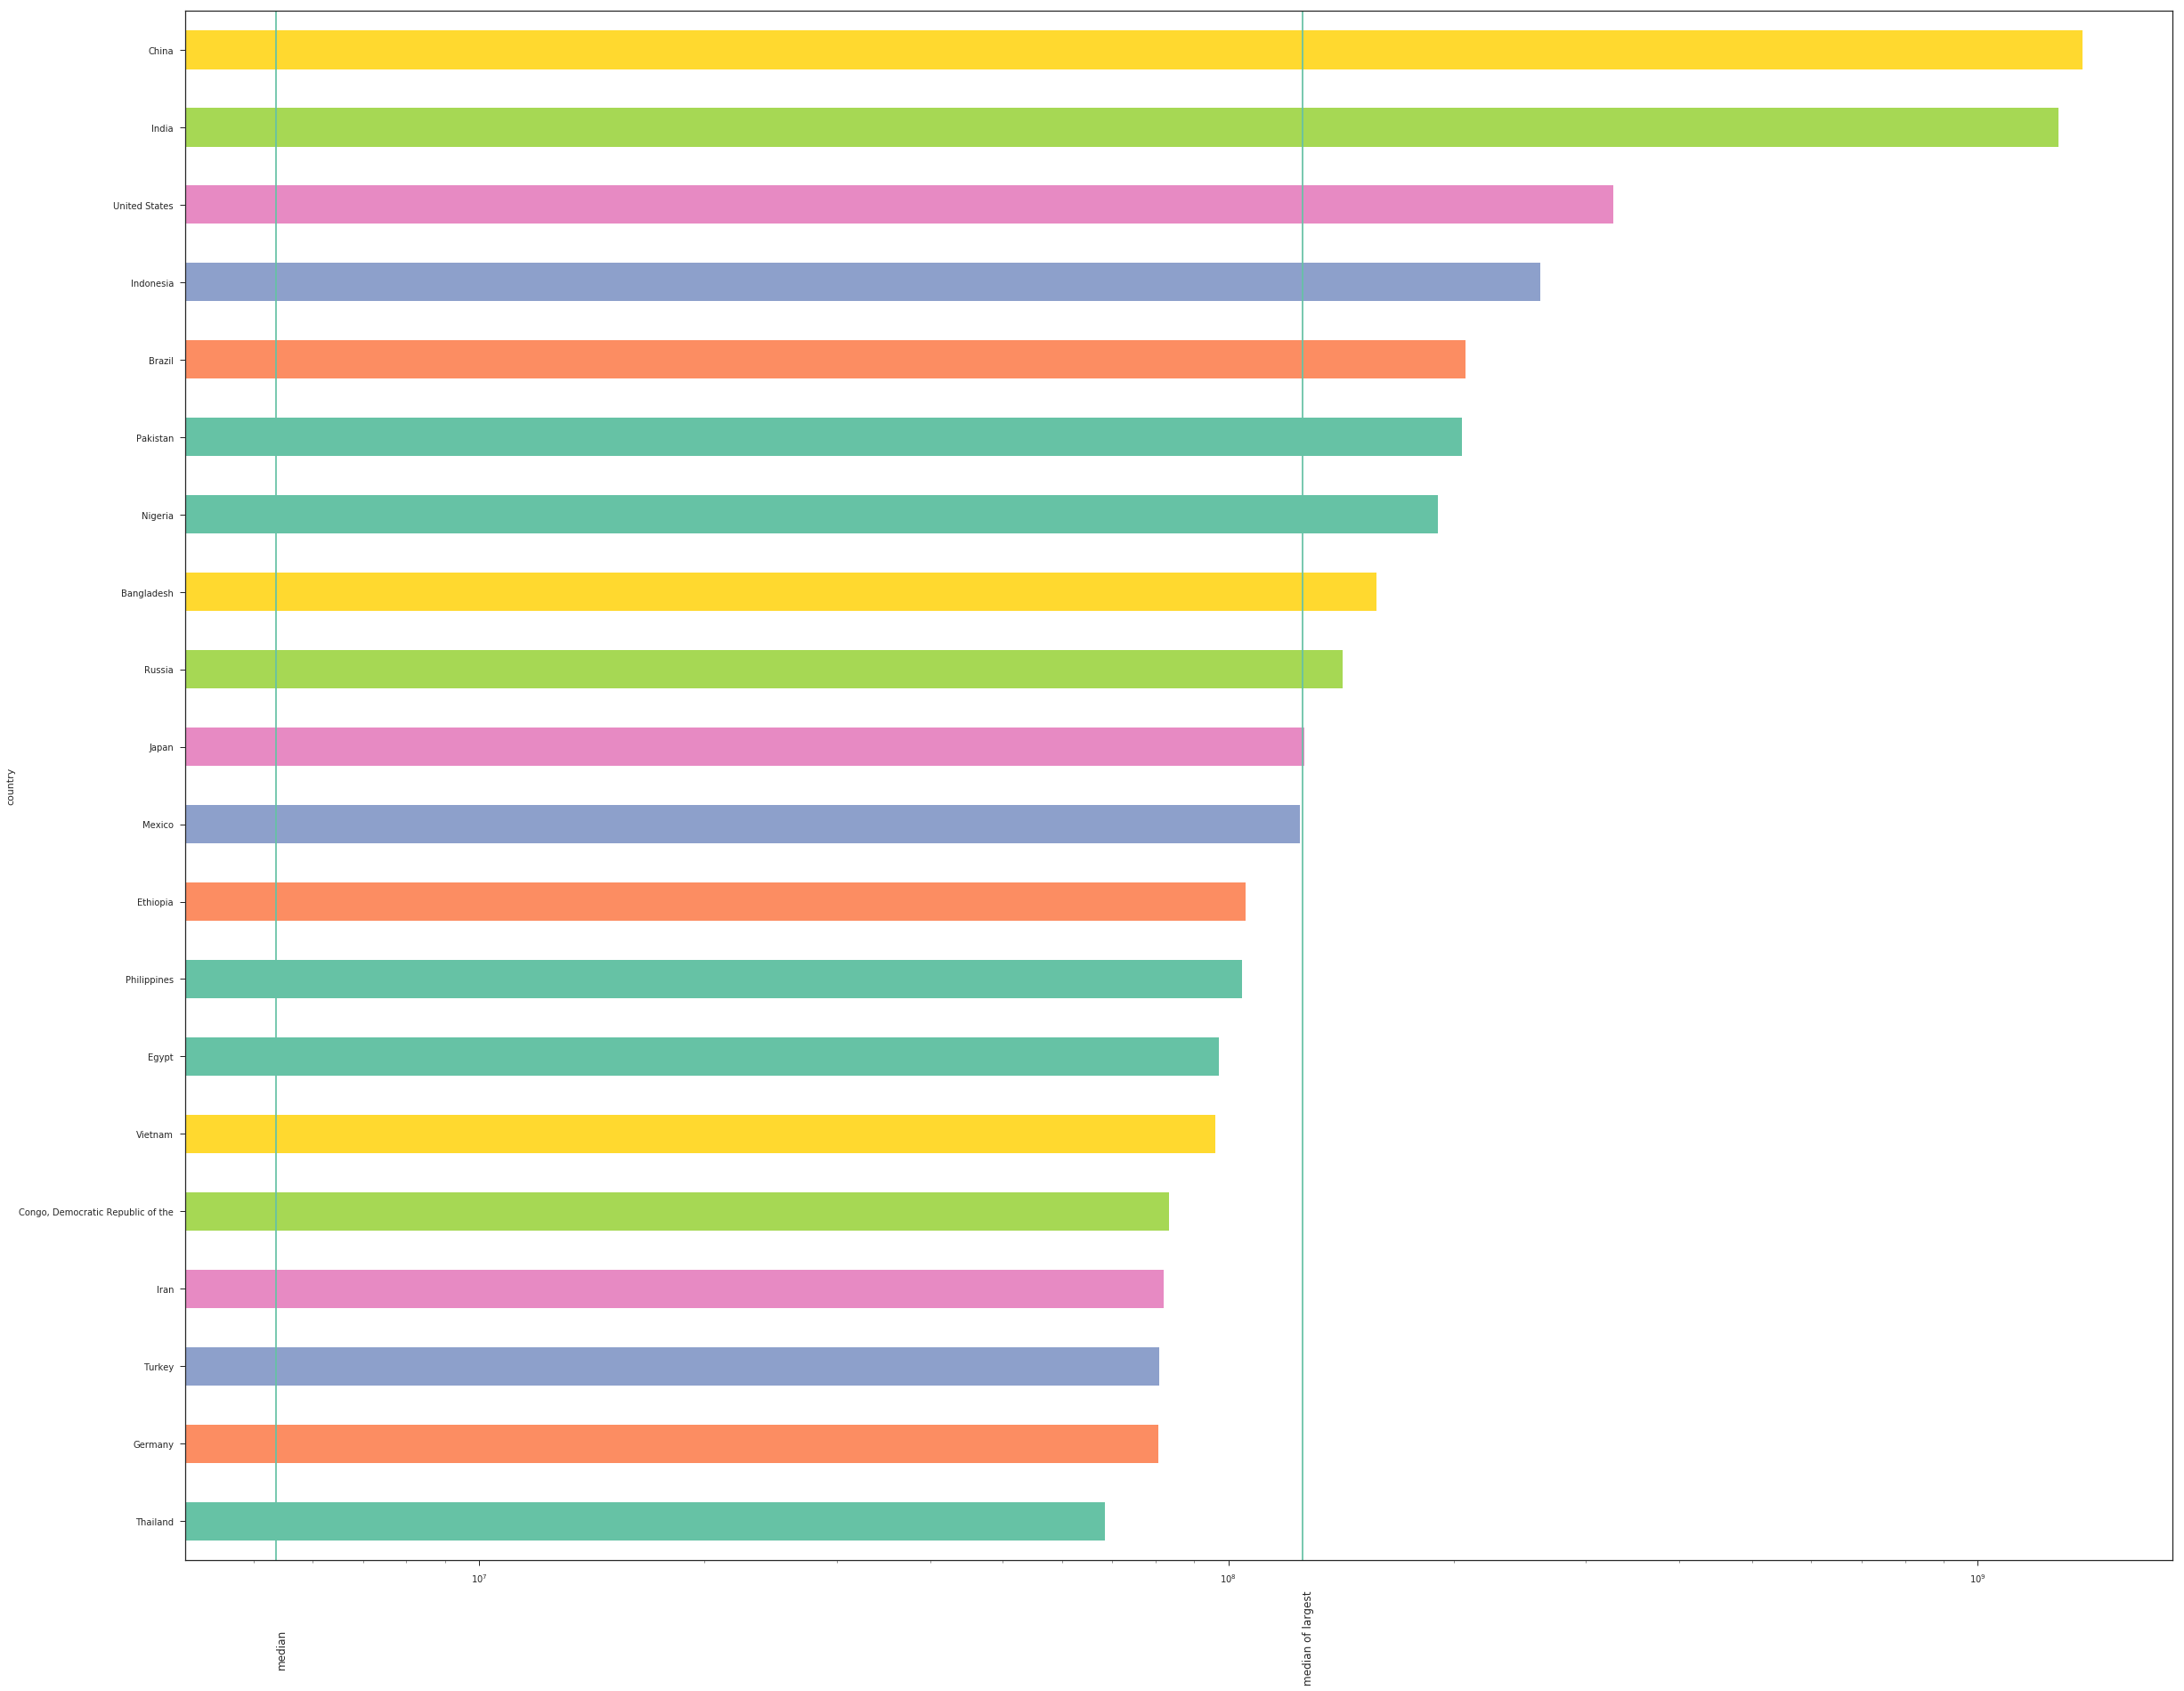

In [22]:
largest_pop.sort_values(ascending=True).plot(kind="barh", logx=True)
median_overall = populations.median()
median_largest =  largest_pop.median()
plt.axvline(x=median_overall, label="median population")
plt.text(median_overall,-1.5,'median',rotation=90)
plt.axvline(x=median_largest, label="median of largest")
plt.text(median_largest,-1.0,'median of largest',rotation=90)
plt.show()

## Scatterplot

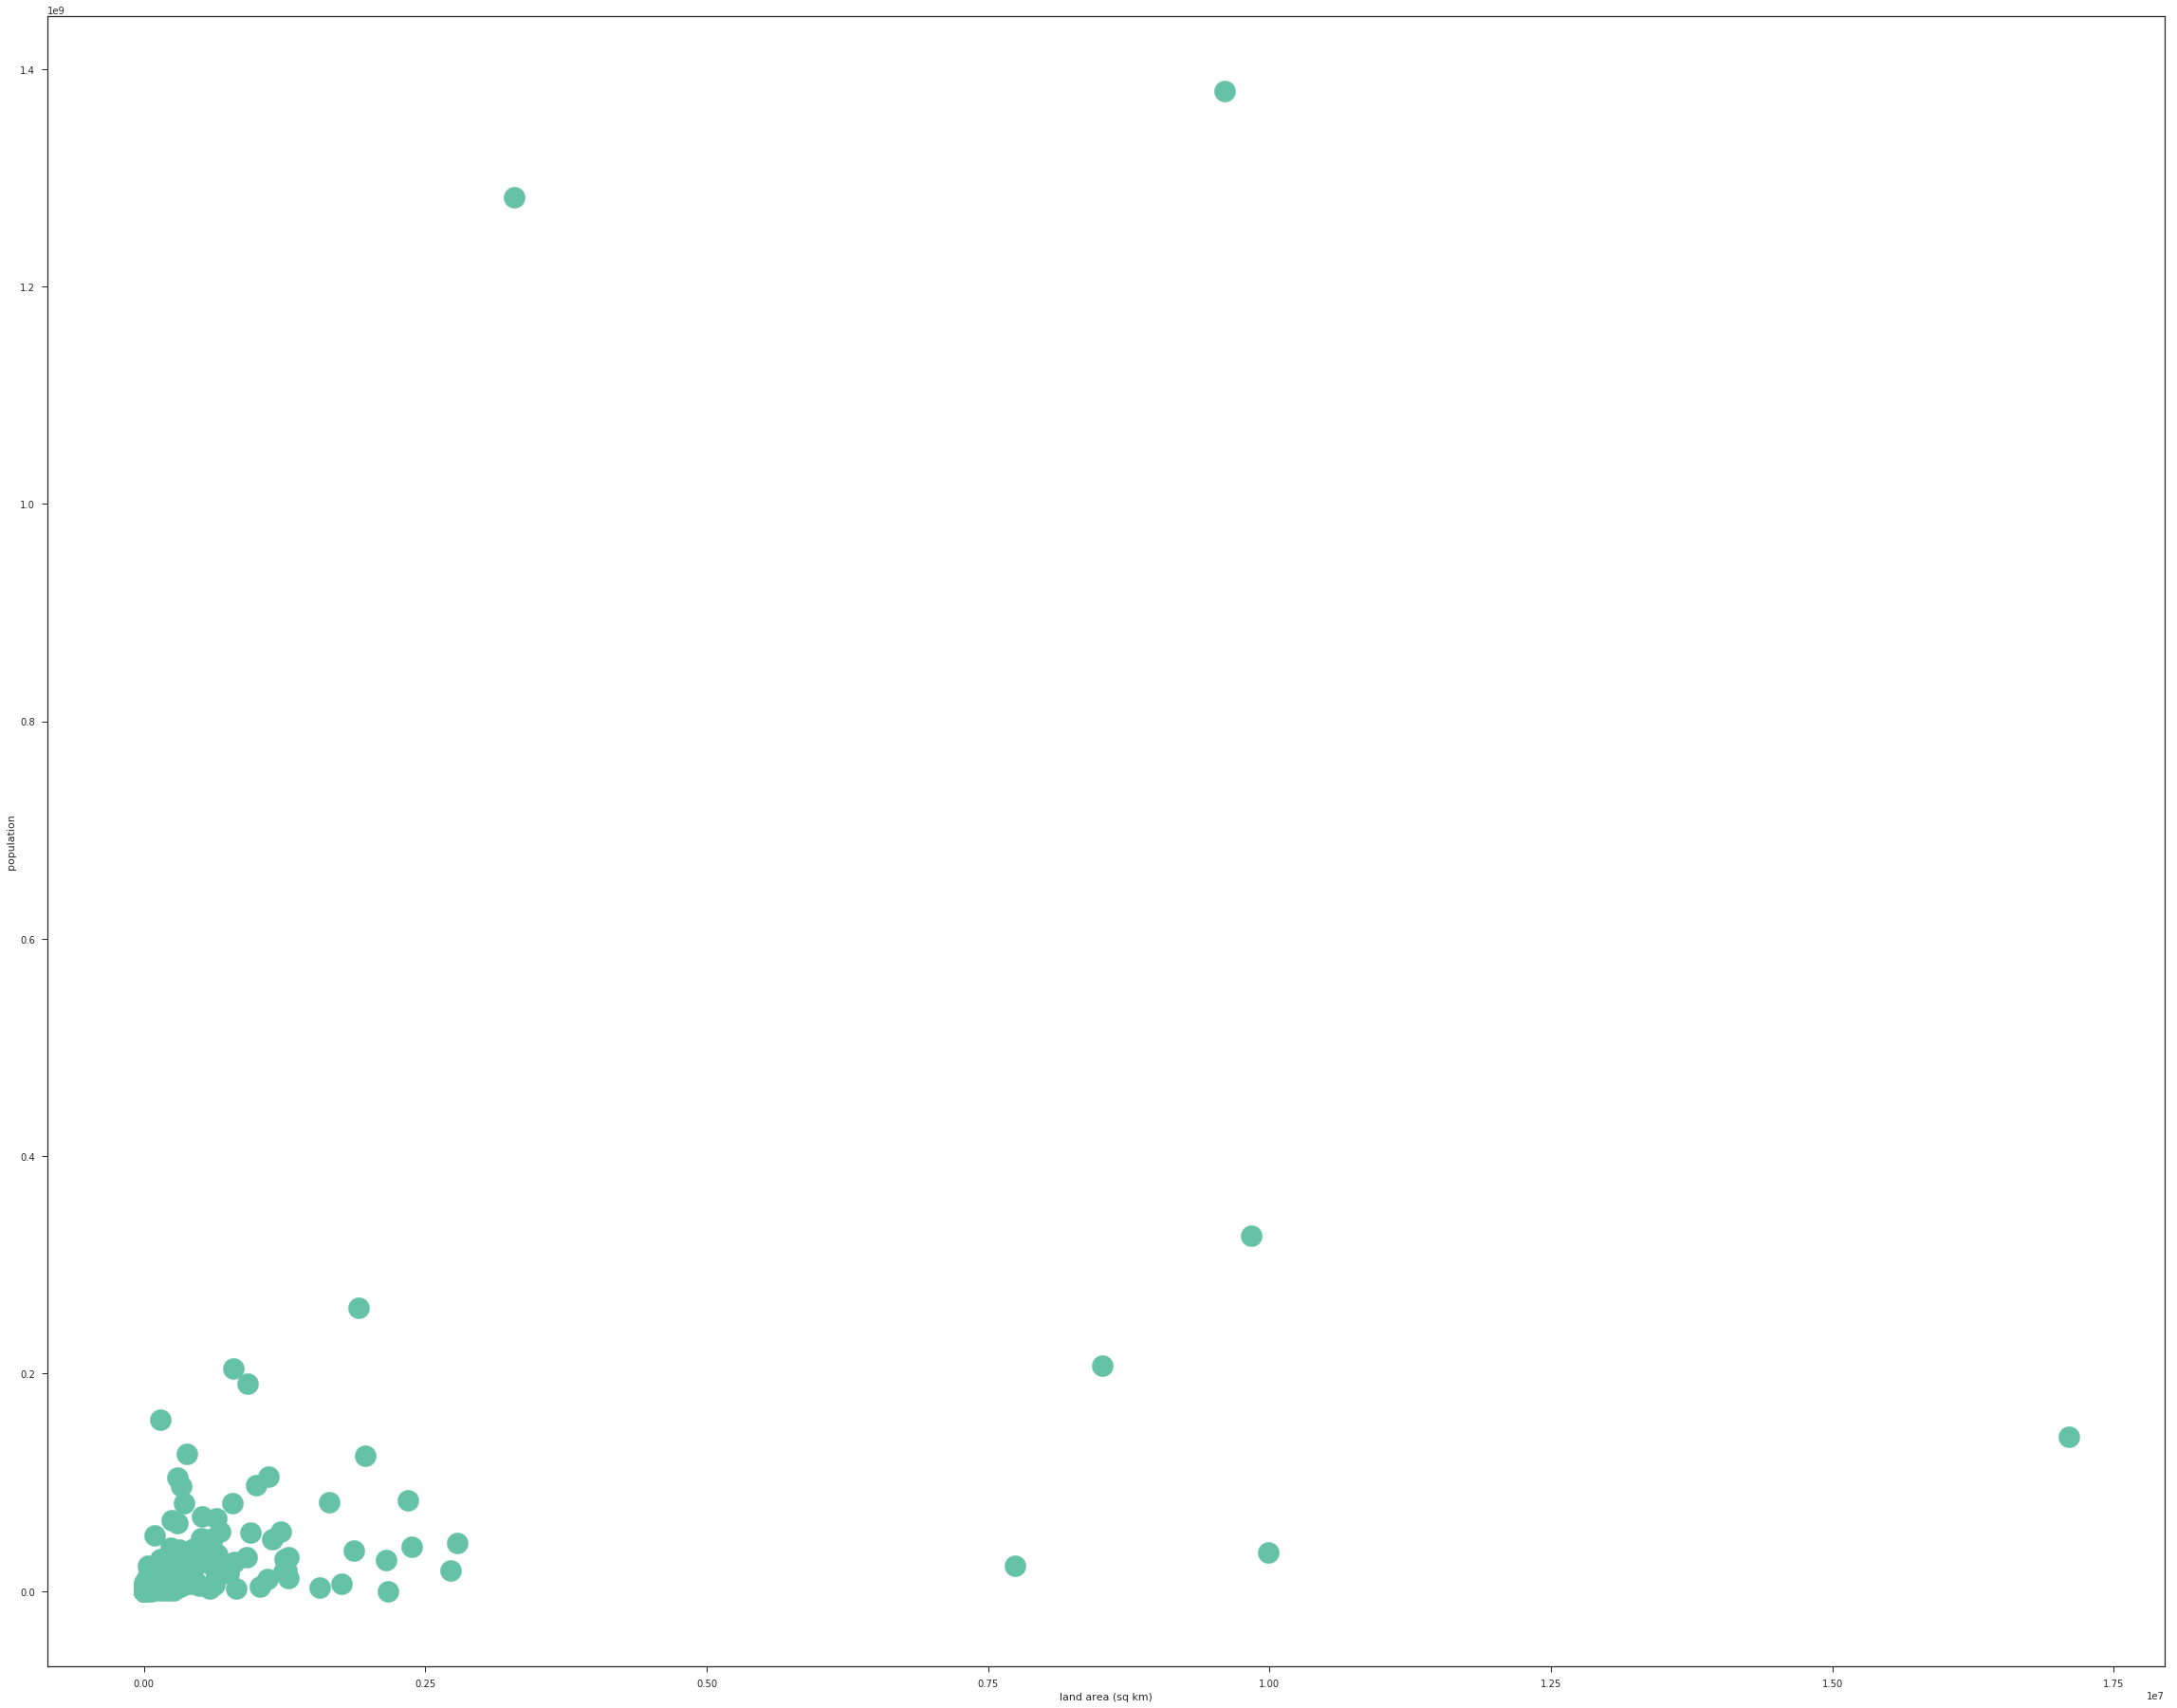

In [23]:
density = country_data[["land area (sq km)", "population"]].dropna()
density.plot(kind="scatter", x="land area (sq km)", y="population", s=500)
plt.show()

### What if we want to annotate the marks on our scatterplot? 

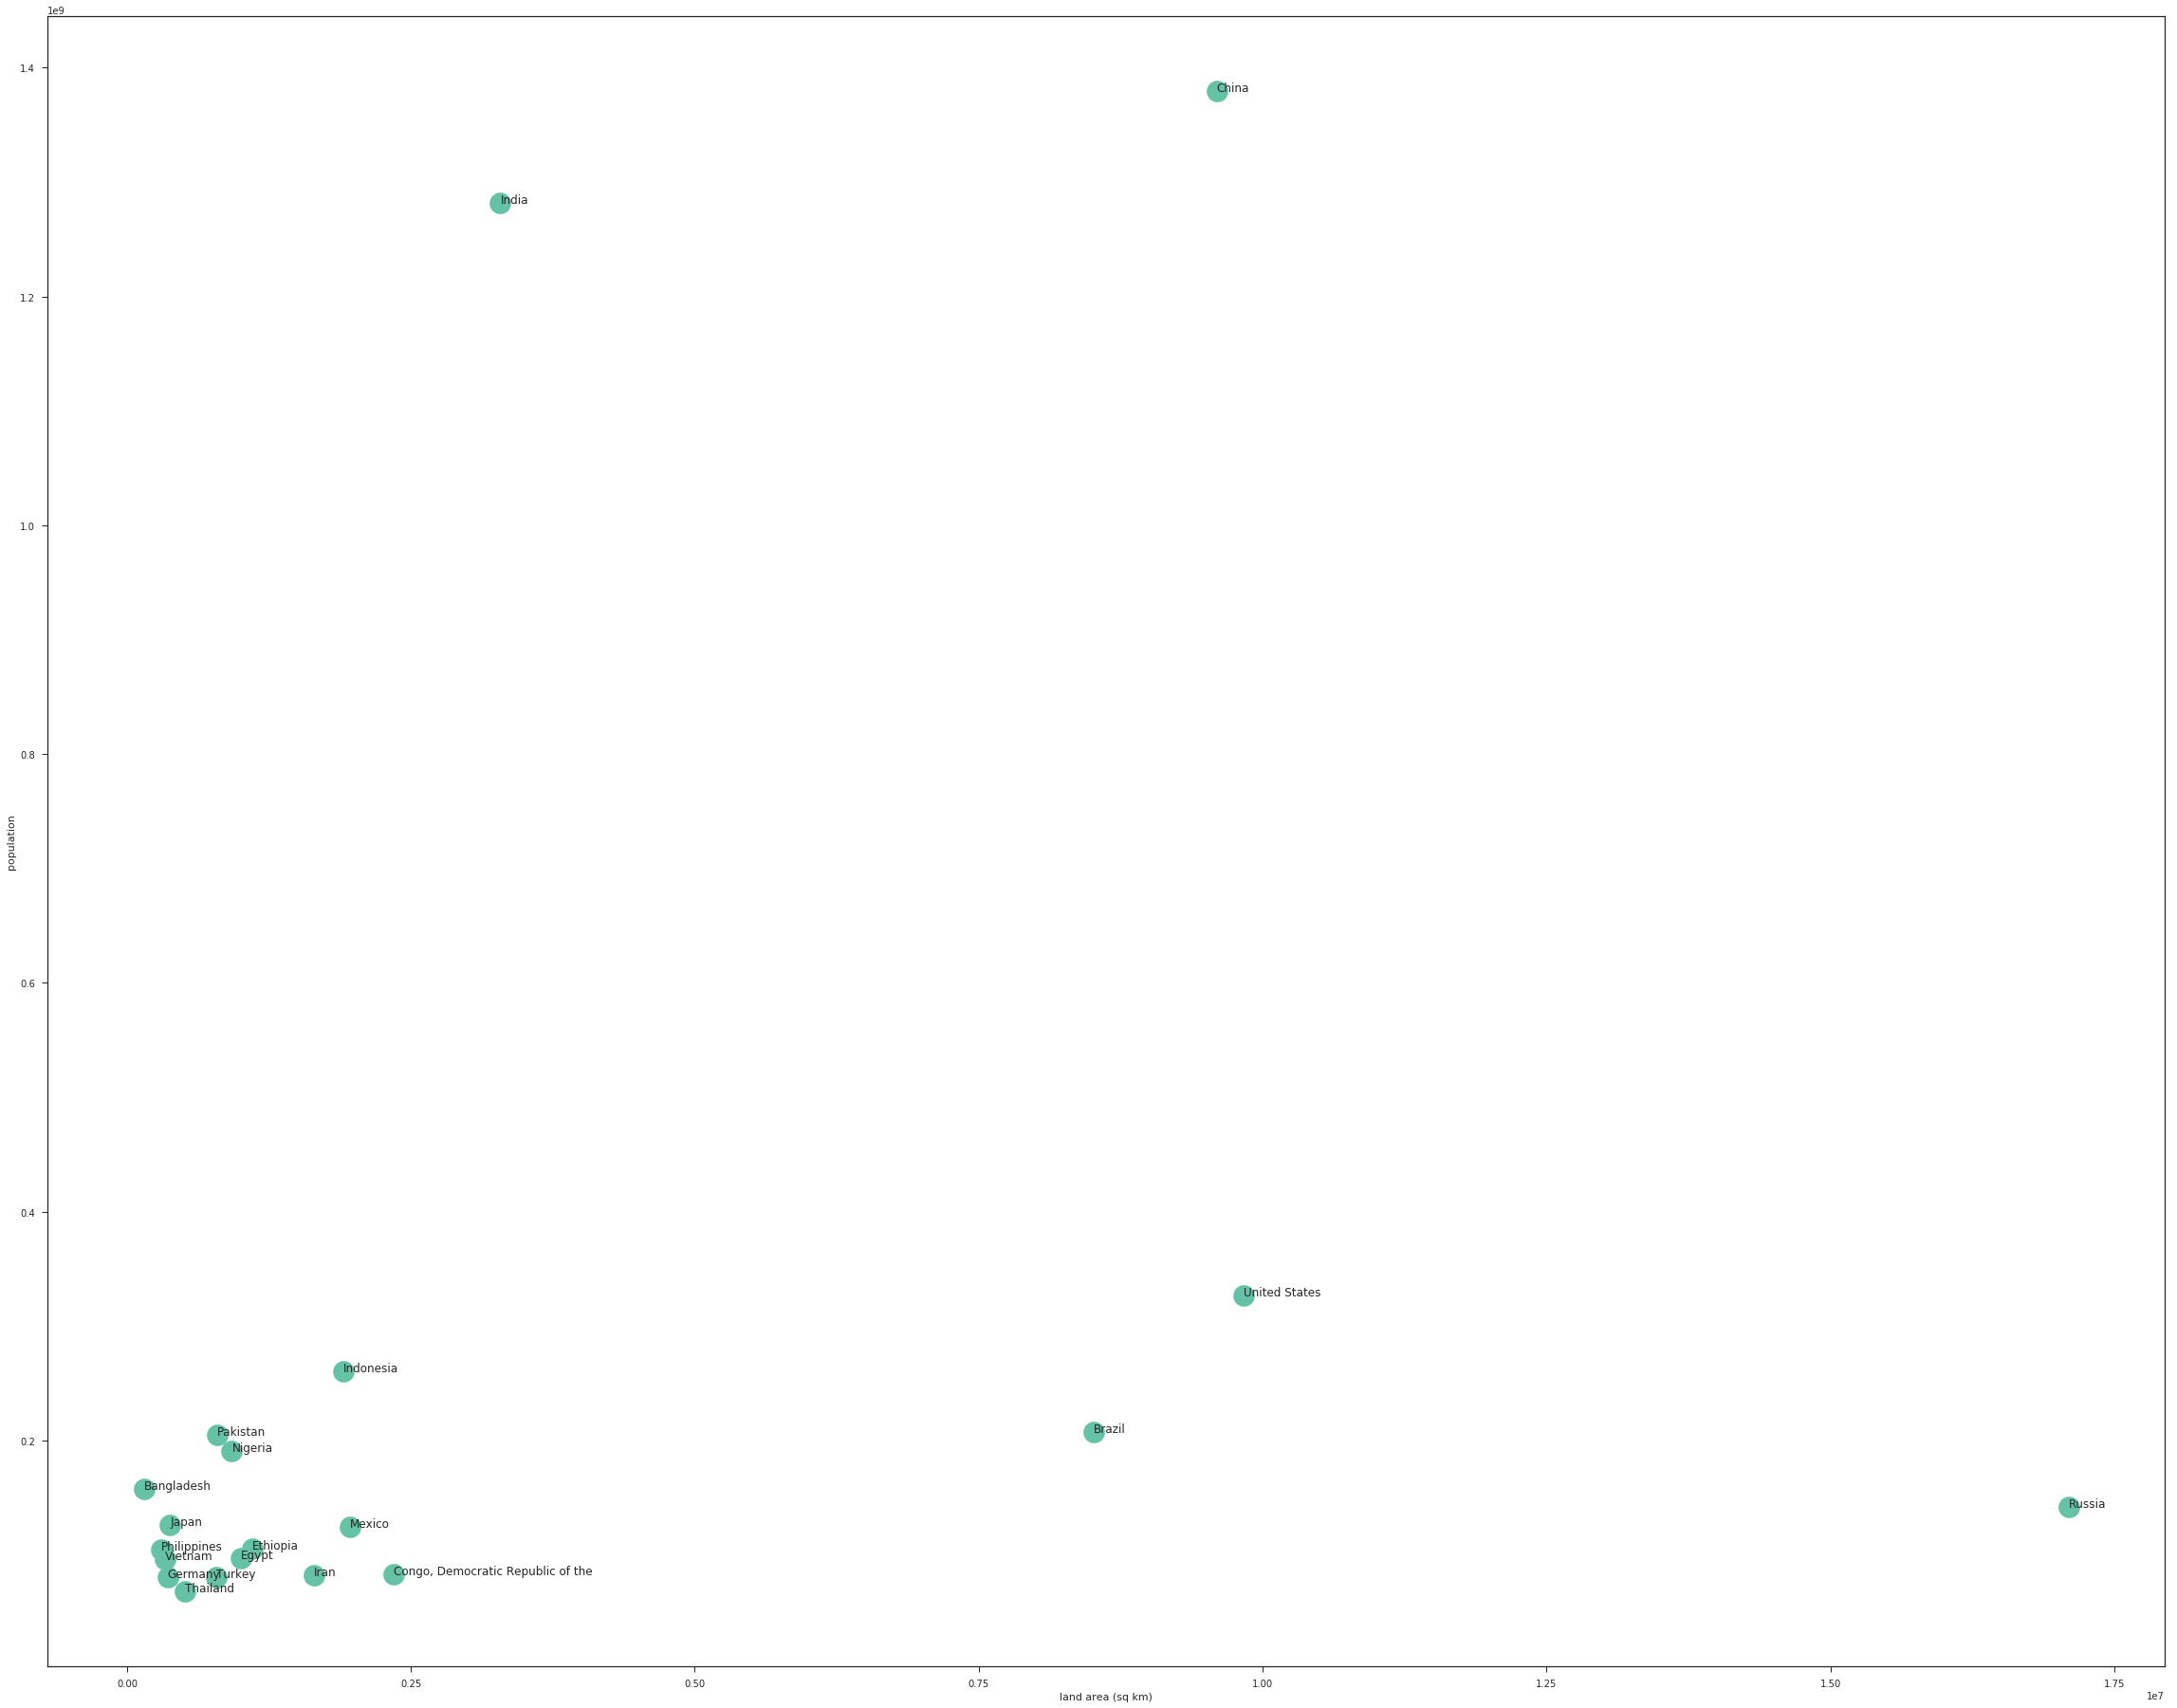

In [24]:
# just gives a handle to the figure and axes of our plot
fig, ax = plt.subplots()
largest_density = density.nlargest(20, columns="population")
largest_density.plot(kind="scatter", x="land area (sq km)", y="population", s=500, ax=ax)

for k,v in largest_density.iterrows():
    ax.annotate(k, v)
plt.show()

### Using the size and color of the mark to indicate additional info

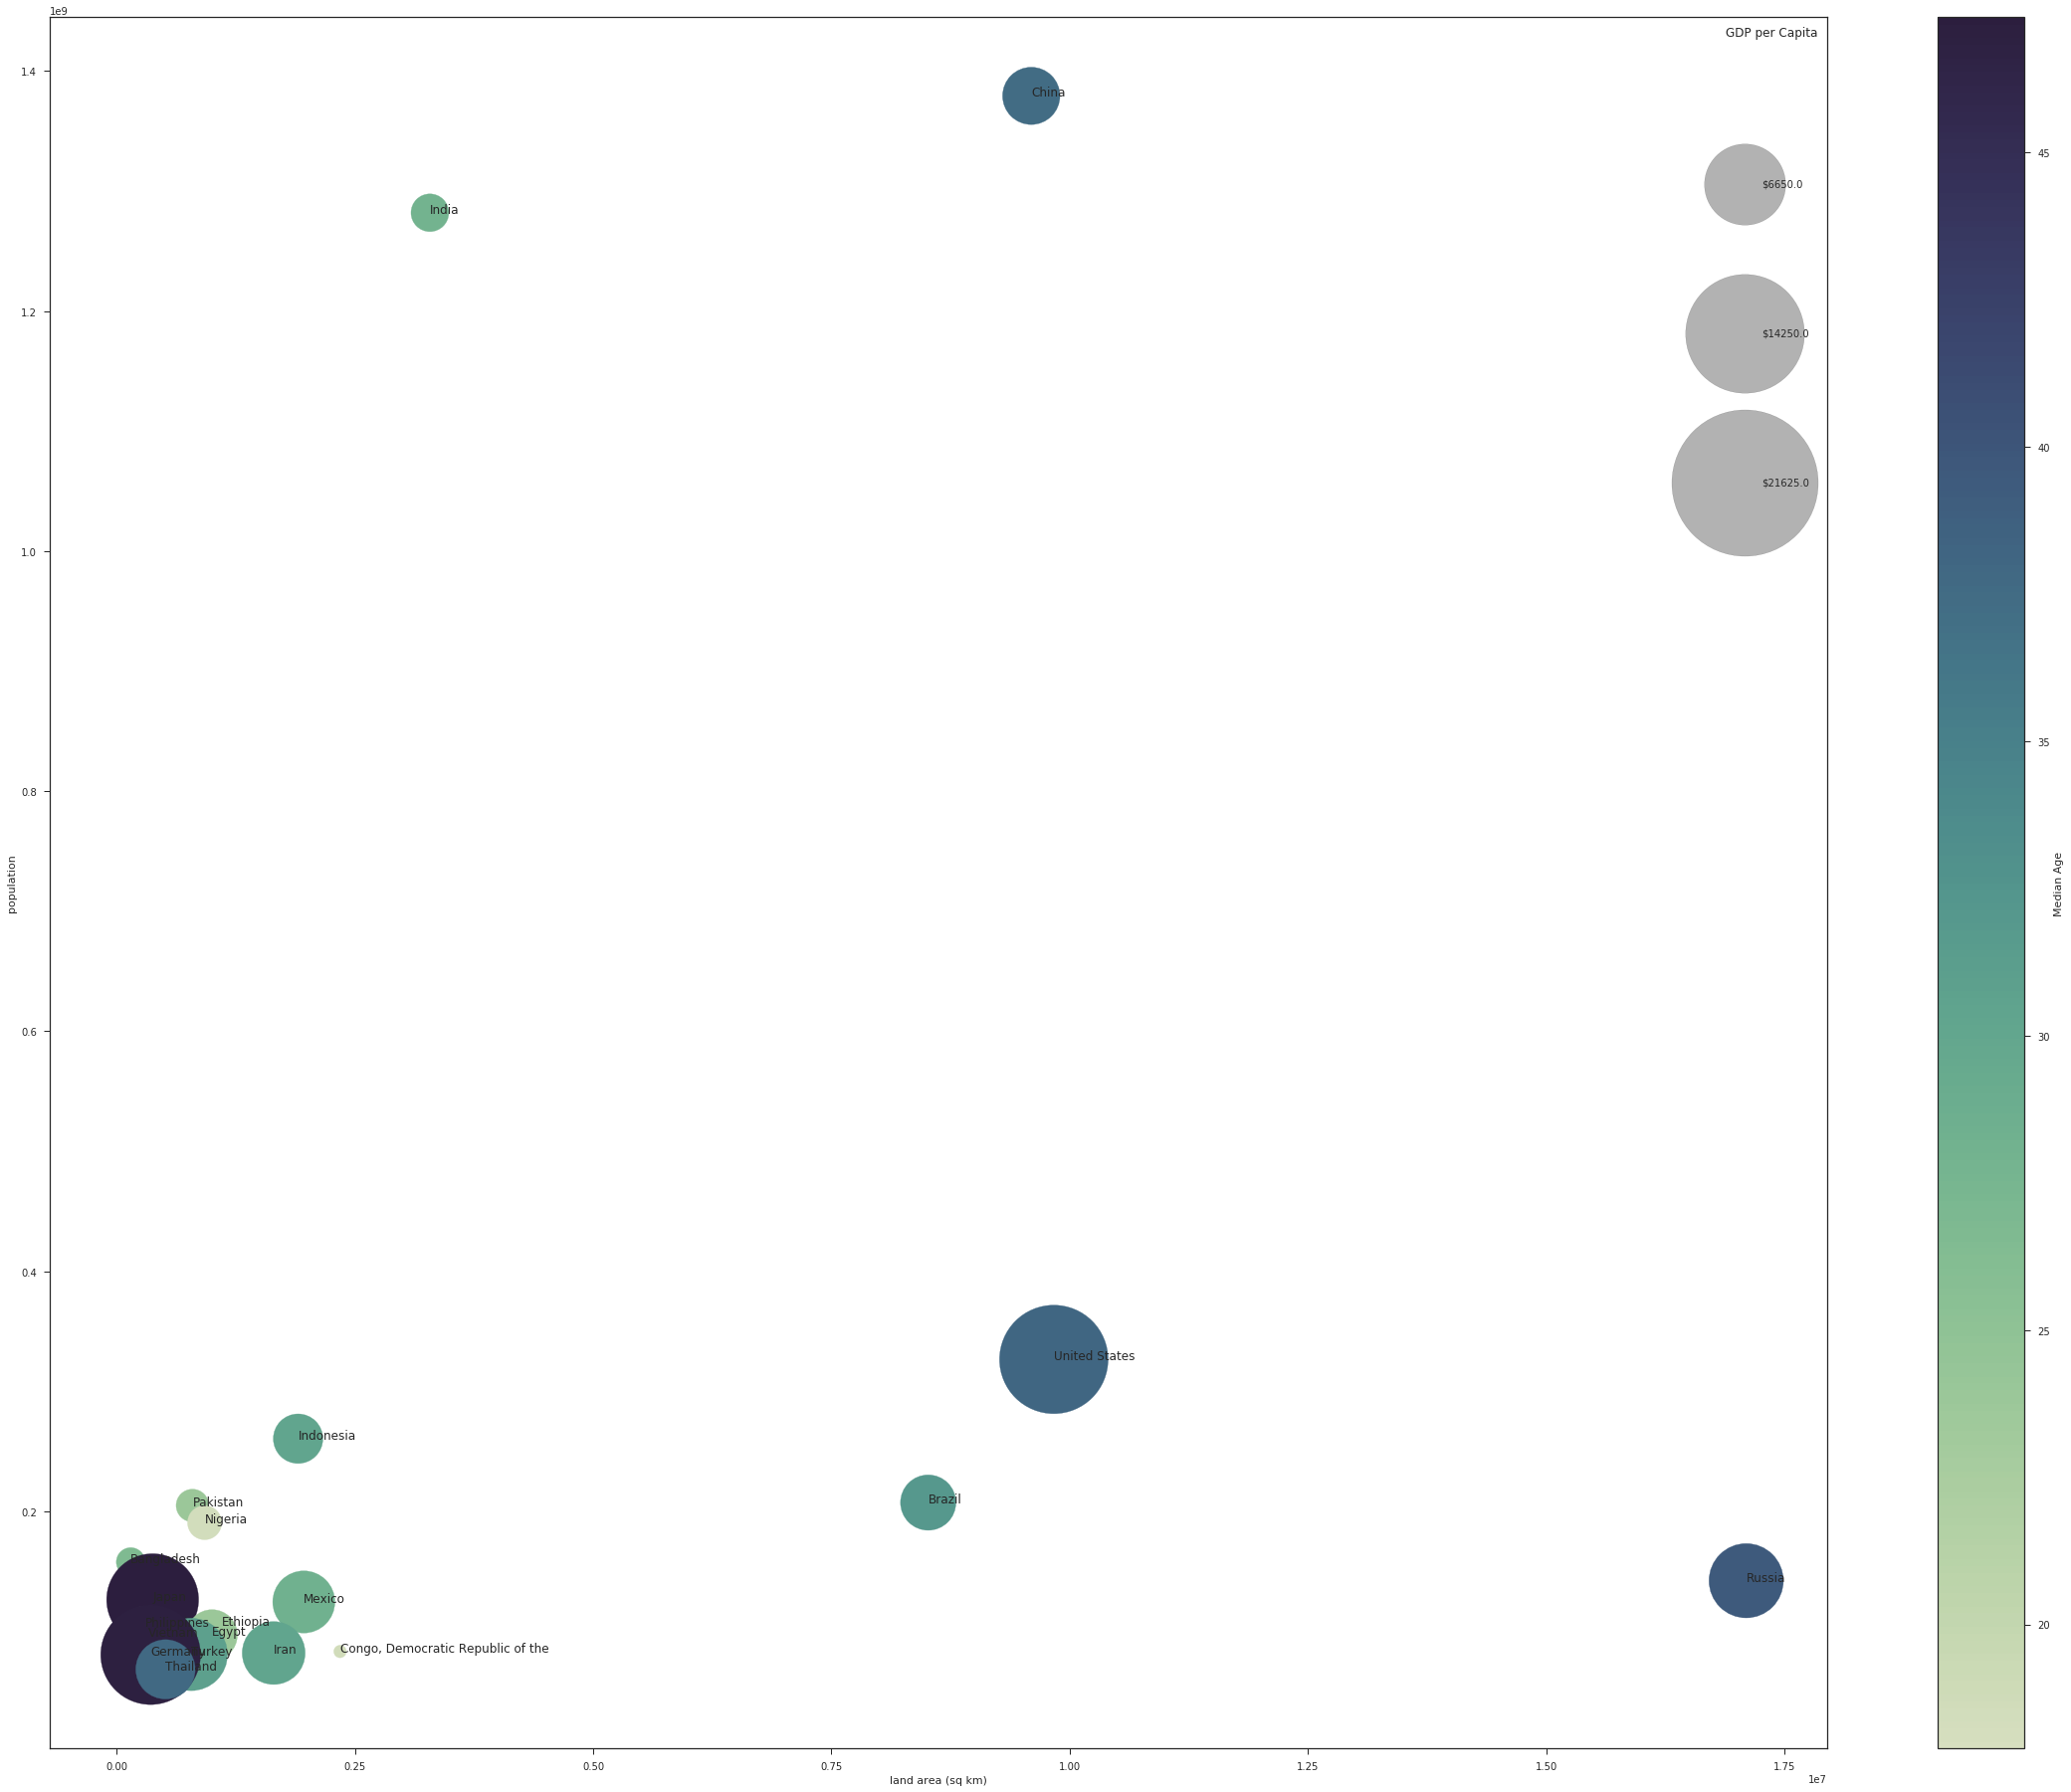

In [34]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

fig, ax = plt.subplots()
other_info = country_data[["land area (sq km)", "population", "gdp per capita", "median age"]].dropna().nlargest(20, columns="population")
other_info.plot(kind="scatter",
                x="land area (sq km)",
                y="population",
                s=other_info["gdp per capita"]/5.0,
                c=other_info["median age"],
                ax=ax,
                cmap=cmap)


for k,v in other_info[["land area (sq km)", "population"]].iterrows():
    ax.annotate(k, v)
    

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for gdp in [other_info["gdp per capita"].quantile(.25),
            other_info["gdp per capita"].quantile(.5),
            other_info["gdp per capita"].quantile(.75)]:
    plt.scatter([], [], c='k', alpha=0.3, s=gdp,
                label="$%s" % gdp)
plt.legend(scatterpoints=1, frameon=False, labelspacing=14, title='GDP per Capita')

# add a label to the color bar
ax.collections[0].colorbar.set_label("Median Age")
plt.show()

## Histograms

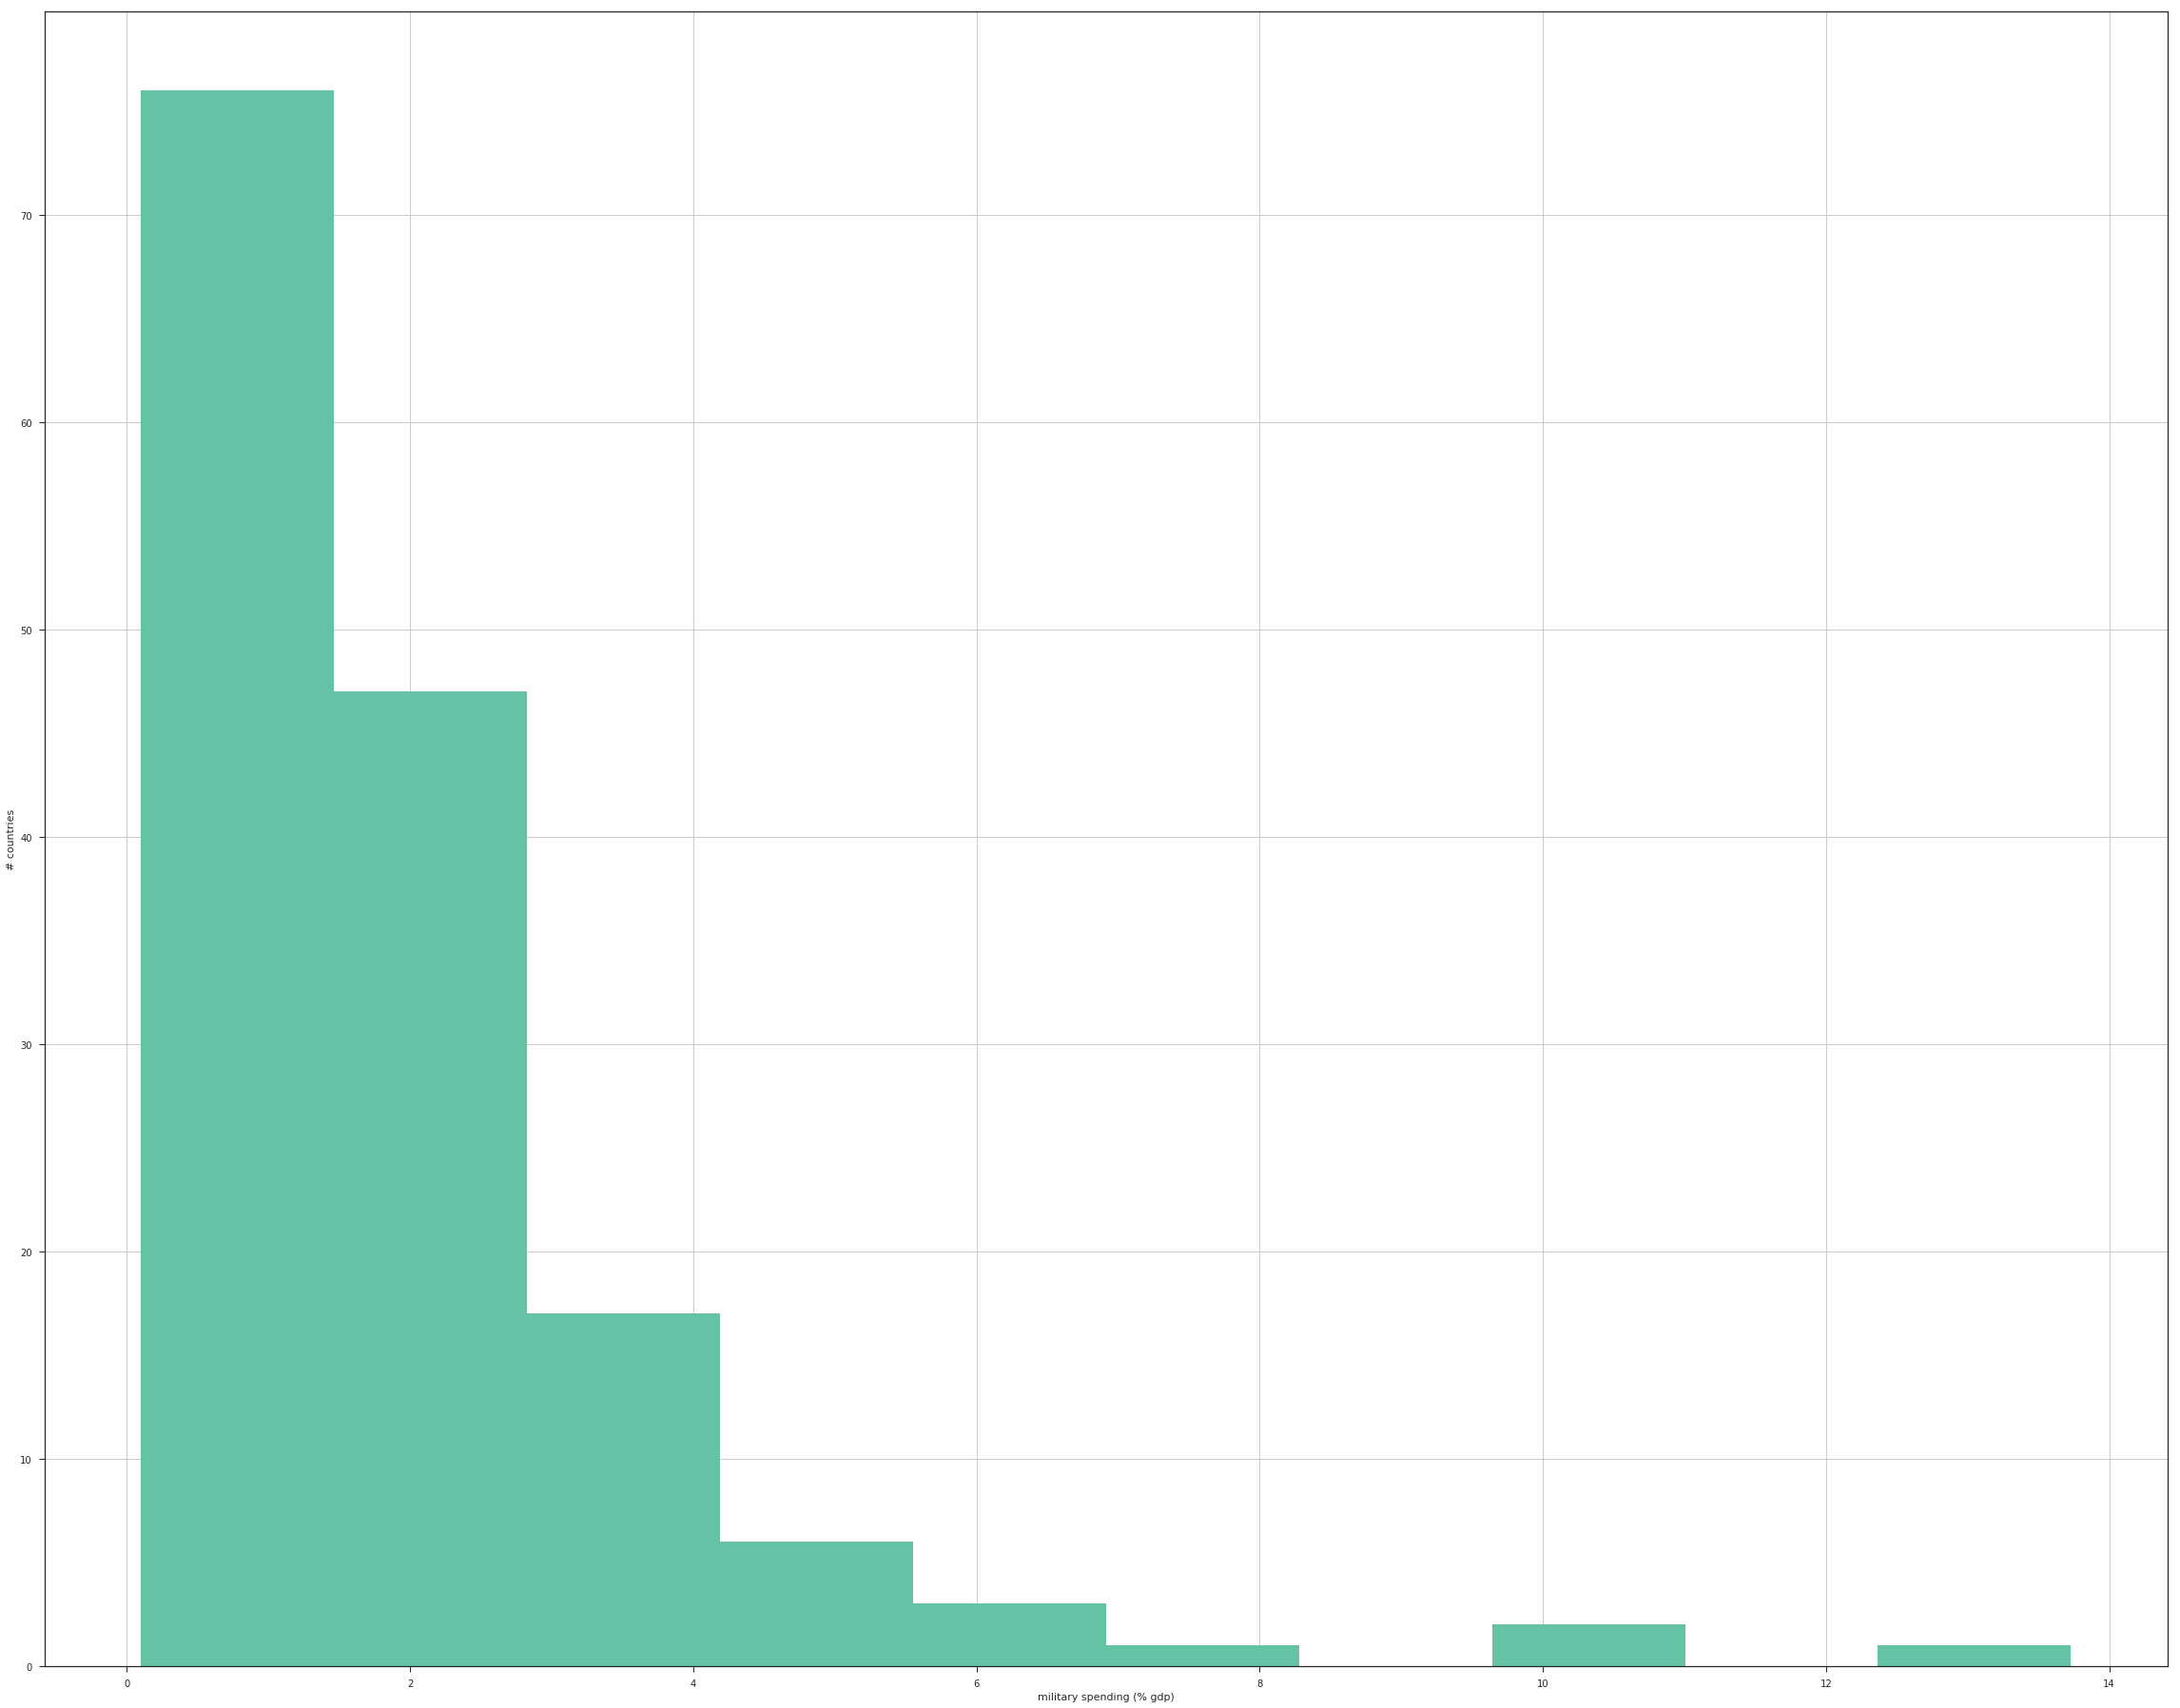

In [27]:
country_data["military spending (% gdp)"].dropna().hist()
plt.xlabel("military spending (% gdp)")
plt.ylabel("# countries")
plt.show()

## Joint Plot: Combining Histograms and Scatterplots

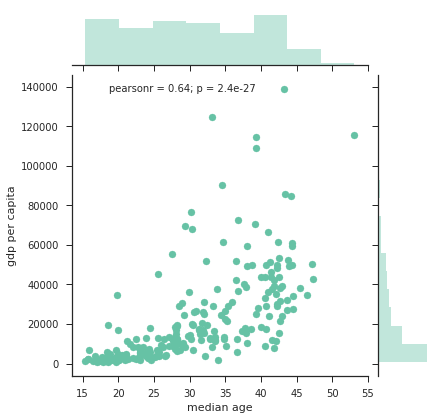

In [29]:
sns.jointplot("median age", "gdp per capita", country_data[["gdp per capita", "median age"]].dropna())
plt.show()

### we can also add a regression line!

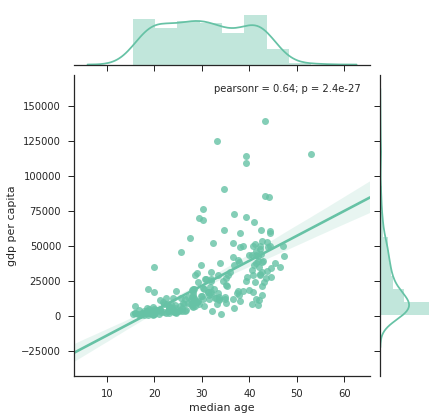

In [30]:
sns.jointplot("median age", "gdp per capita", country_data[["gdp per capita", "median age"]].dropna(), kind="reg")
plt.show()

## There are many other kinds of plots. Think about what is the best way to express what you are trying to show. If the answer isn't above or covered previously in class, consider checking the [seaborn gallery](https://seaborn.pydata.org/examples/) or the [matplotlib gallery](https://matplotlib.org/gallery.html). If the answer still isn't there, let's talk!